In [1]:
import os
from pathlib import Path
import pathlib
from pandas.core.frame import DataFrame
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import librosa
import librosa.display
import IPython.display as ipd
import time

In [2]:
files_path = 'D:\\music2\\'
file_list = os.listdir(files_path)
print(file_list)

['015B_그녀에게 전화오게 하는 방법.wav', '2NB_눈시울.wav', '2NE1_내가 제일 잘나가.wav', '2NE1_너 아님 안돼.wav', 'AOA_단발머리 (Short Hair).wav', 'Black Pearl (블랙펄)_결국... 너잖아.wav', 'Bobo_가을비 우산속.wav', 'Brown Eyed Girls_내가웃고있어요(가인).wav', 'Buzz_가시.wav', 'DJ DOC_나의 성공담.wav', 'Fly To The Sky_너를 너를 너를.wav', 'H-유진_날 사랑하지 마요 (Feat. J).wav', 'HI SUHYUN _나는 달라 (Feat. BOBBY).wav', 'humming urban stereo_님.wav', 'Hun_고맙습니다.wav', 'JK 김동욱_다신 없겠죠.wav', 'M to M_내가 세상에 없을 때.wav', 'M.C. The Max_나를 보낸다.wav', 'MC몽_내 생애 가장 행복한 시간 (Feat. 허각).wav', 'MC몽_내가 그리웠니 (Feat. 진실 Of Mad Soul Child).wav', 'Miss A_다른 남자 말고 너.wav', 'PSY_나팔바지.wav', 'Rainbow_꿈.wav', 'SeeYa_그 놈 목소리.wav', 'SG워너비_가을 사랑.wav', 'SG워너비_그대를 사랑합니다.wav', 'SG워너비_내 마음의 보석상자.wav', 'Sharp_눈물.wav', 'Tei(테이)_같은 베개....wav', 'Tim(팀)_고마웠다고...wav', 'WINNER_끼부리지마.wav', 'Yuri_가슴아 제발.wav', 'Zia_가지 말아요.wav', 'Zion.T_꺼내 먹어요.wav', '가비앤제이(gavy nj)_그녀가 울고 있네요.wav', '거미_거울을 보다가 (Feat. Red Roc).wav', '걸스데이(Girls Day)_기대해.wav', '고유비_꼭 기억해.wav', '고유진_너 하나만.wav', '규현 (KyuHyun)_광화문에서 (At Gwanghwamun).w

In [3]:
singer_list = []
song_list = []

for file in file_list:
    file_name = file.replace('.wav', '')
  
    singer, song = file_name.split('_')
  # print(singer)
  # print(song)
  # print('--'*15)
  
    singer = singer.replace(' ', '_')
    song = song.replace(' ', '_')
    print(singer)
    print(song)
    print('--'*15)
  
    singer_list.append(singer)
    song_list.append(song)

015B
그녀에게_전화오게_하는_방법
------------------------------
2NB
눈시울
------------------------------
2NE1
내가_제일_잘나가
------------------------------
2NE1
너_아님_안돼
------------------------------
AOA
단발머리_(Short_Hair)
------------------------------
Black_Pearl_(블랙펄)
결국..._너잖아
------------------------------
Bobo
가을비_우산속
------------------------------
Brown_Eyed_Girls
내가웃고있어요(가인)
------------------------------
Buzz
가시
------------------------------
DJ_DOC
나의_성공담
------------------------------
Fly_To_The_Sky
너를_너를_너를
------------------------------
H-유진
날_사랑하지_마요_(Feat._J)
------------------------------
HI_SUHYUN_
나는_달라_(Feat._BOBBY)
------------------------------
humming_urban_stereo
님
------------------------------
Hun
고맙습니다
------------------------------
JK_김동욱
다신_없겠죠
------------------------------
M_to_M
내가_세상에_없을_때
------------------------------
M.C._The_Max
나를_보낸다
------------------------------
MC몽
내_생애_가장_행복한_시간_(Feat._허각)
------------------------------
MC몽
내가_그리웠니_(Feat._진실_Of_Mad_Soul_Child)
---

In [4]:
print(len(singer_list))
print(singer_list)

249
['015B', '2NB', '2NE1', '2NE1', 'AOA', 'Black_Pearl_(블랙펄)', 'Bobo', 'Brown_Eyed_Girls', 'Buzz', 'DJ_DOC', 'Fly_To_The_Sky', 'H-유진', 'HI_SUHYUN_', 'humming_urban_stereo', 'Hun', 'JK_김동욱', 'M_to_M', 'M.C._The_Max', 'MC몽', 'MC몽', 'Miss_A', 'PSY', 'Rainbow', 'SeeYa', 'SG워너비', 'SG워너비', 'SG워너비', 'Sharp', 'Tei(테이)', 'Tim(팀)', 'WINNER', 'Yuri', 'Zia', 'Zion.T', '가비앤제이(gavy_nj)', '거미', '걸스데이(Girls_Day)', '고유비', '고유진', '규현_(KyuHyun)', '그루(Gru)', '김_광석', '김경호', '김광석', '김돈규', '김돈규', '김동률', '김동률', '김동률', '김동률', '김동욱', '김동준', '김민종', '김범수', '김범수', '김상민', '김수철', '김연우', '김연우', '김지연', '김태우', '김현성', '김현정', '김형중', '김혜림', '나무', '나비', '나얼', '나얼', '남규리', '넬(Nell)', '노을', '다비치', '다이나믹_듀오', '더넛츠', '더원(The_One)', '듀크', '드렁큰_타이거', '디셈버(December)', '디셈버', '레디오', '레이디스_코드', '렉시', '리즈', '리즈', '린(LYn)', '린', '마마무', '마야', '먼데이키즈', '미쓰에이', '바비_킴', '박기영', '박완규', '박정현', '박정현', '박정현', '박지윤5집', '박학기', '배치기', '백아연', '백지영', '뱅크(Bank)', '버즈(BUZZ)', '버즈(Buzz)', '버즈', '벅(Buck)', '베이시스', '변진섭', '별(Star)', '별', '보이스_원', '보이스

In [5]:
print(len(song_list))
print(song_list)

249
['그녀에게_전화오게_하는_방법', '눈시울', '내가_제일_잘나가', '너_아님_안돼', '단발머리_(Short_Hair)', '결국..._너잖아', '가을비_우산속', '내가웃고있어요(가인)', '가시', '나의_성공담', '너를_너를_너를', '날_사랑하지_마요_(Feat._J)', '나는_달라_(Feat._BOBBY)', '님', '고맙습니다', '다신_없겠죠', '내가_세상에_없을_때', '나를_보낸다', '내_생애_가장_행복한_시간_(Feat._허각)', '내가_그리웠니_(Feat._진실_Of_Mad_Soul_Child)', '다른_남자_말고_너', '나팔바지', '꿈', '그_놈_목소리', '가을_사랑', '그대를_사랑합니다', '내_마음의_보석상자', '눈물', '같은_베개...', '고마웠다고..', '끼부리지마', '가슴아_제발', '가지_말아요', '꺼내_먹어요', '그녀가_울고_있네요', '거울을_보다가_(Feat._Red_Roc)', '기대해', '꼭_기억해', '너_하나만', '광화문에서_(At_Gwanghwamun)', 'Pasta', '내_사람이여', '금지된_사랑', '거리에서', '나만의_슬픔', '단(但)', '그건_말야', '그게_나야', '다시_사랑한다_말할까', '다시_시작해보자', '내눈물보다', '나_혼자(Alone)', '귀천도애', '가슴에_지는_태양', '니가_날_떠나', '너에게', '내일', '가질_수_없는_너__(화생방실_클레오파트라)', '나와_같다면', '그때_까지만', '꿈을_꾸다_(Main_Ver.)', '고백', '그녀와의_이별', '그랬나봐_(Piano_Ver.)', '날_위한_이별', '그날_이후', '길에서', '같은_시간_속의_너', '귀로', '깊은_밤을_날아서', '기억을_걷는_시간', '늦은_얘기들', '괜찮아_사랑이야', '꿀잼', '그녀가_아파요_(지현우_Ver.)', '내여자', '그대_눈물까지도', '남자기_때문에', '눈부신_눈물', '네게_줄_수_있는건_오직_사랑뿐',

In [6]:
y, sr = librosa.core.load(files_path + file_list[0],sr=16000)
print(y)
print(sr)
print(y.shape)

[ 0.          0.          0.         ... -0.01746011 -0.00098329
  0.074688  ]
16000
(1920000,)


[[-585.31714   -585.31714   -585.31714   ... -102.57361    -51.69091
   -71.336914 ]
 [   0.           0.           0.        ...   74.60716     98.870926
   105.9986   ]
 [   0.           0.           0.        ...   -3.9956994  -54.15299
   -51.61448  ]
 ...
 [   0.           0.           0.        ...    2.26615     -2.9977703
    -9.945072 ]
 [   0.           0.           0.        ...   -2.122465     4.9145813
    -6.0527177]
 [   0.           0.           0.        ...  -14.186409   -10.872969
   -17.940811 ]]
(13, 1876)
[[-585.31714      0.           0.        ...    0.           0.
     0.       ]
 [-585.31714      0.           0.        ...    0.           0.
     0.       ]
 [-585.31714      0.           0.        ...    0.           0.
     0.       ]
 ...
 [-102.57361     74.60716     -3.9956994 ...    2.26615     -2.122465
   -14.186409 ]
 [ -51.69091     98.870926   -54.15299   ...   -2.9977703    4.9145813
   -10.872969 ]
 [ -71.336914   105.9986     -51.61448   ...   -9

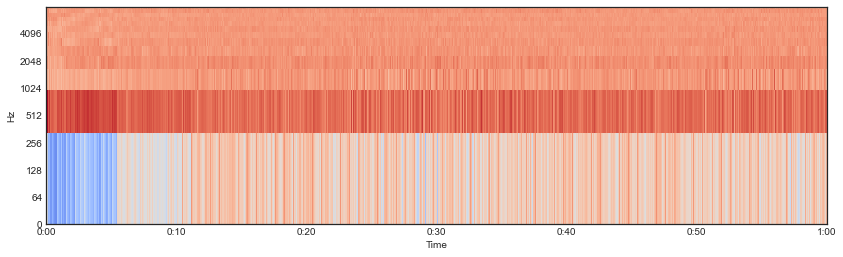

In [9]:
mfccs = librosa.feature.mfcc(y,n_mfcc=13,sr=16000,hop_length=1024)
plt.figure(figsize=(14, 4))
librosa.display.specshow(mfccs, sr=sr, hop_length=512, x_axis='time', y_axis='log')

print(mfccs)
print(mfccs.shape)
print(mfccs.T)

In [10]:
print(mfccs.shape[0])
print(mfccs.shape[1])
print(mfccs.T.shape[0])
print(mfccs.T.shape[1])

13
1876
1876
13


In [11]:
df = pd.DataFrame(mfccs.T)
df

0           1          2          3          4          5   \
0    -585.317139    0.000000   0.000000   0.000000   0.000000   0.000000   
1    -585.317139    0.000000   0.000000   0.000000   0.000000   0.000000   
2    -585.317139    0.000000   0.000000   0.000000   0.000000   0.000000   
3    -365.029633  162.806335  -2.569277   6.519772  14.388819   3.393408   
4    -209.120972  197.039948 -40.230095   8.342756 -26.519741 -30.289030   
...          ...         ...        ...        ...        ...        ...   
1871  -69.409042  100.921432  -8.548986   2.502343  -9.624205  15.906788   
1872 -165.658432  105.961266  14.096031  28.196634   5.426165   7.631124   
1873 -102.573608   74.607162  -3.995699  31.343609  27.324888   0.005427   
1874  -51.690910   98.870926 -54.152988  11.898533  -4.048751   1.888304   
1875  -71.336914  105.998596 -51.614479   8.469160  -2.940065  24.563555   

             6          7         8          9          10         11  \
0      0.000000   0.000000  0.000000   0.000000   0.000000   0.000000   
1      0.000000   0.000000  0.000000   0.000000   0.000000   0.000000   
2      0.000000   0.000000  0.000000   0.000000   0.000000   0.000000   
3      7.257912  -3.163780 -9.228497 -16.351929 -20.891804  -7.907193   
4    -26.643547 -17.518560  5.181158   8.511017   6.283422   0.101202   
...         ...        ...       ...        ...        ...        ...   
1871   4.013924 -14.960144 -9.189641  10.169788   5.028411  14.868988   
1872   7.176809  11.745790  2.268678   4.618742  -8.817593  -4.442876   
1873 -11.098988  25.130692  6.489877  -1.224577   2.266150  -2.122465   
1874   1.317891  14.933651  7.478138   8.119409  -2.997770   4.914581   
1875  22.115044   8.863811  9.577732   7.127345  -9.945072  -6.052718   

             12  
0      0.000000  
1      0.000000  
2      0.000000  
3      2.882459  
4      2.301417  
...         ...  
1871 -16.107689  
1872 -15.998455  
1873 -14.186409  
1874 -10.872969  
1875 -17.940811  

[1876 rows x 13 columns]

In [12]:
print(df.shape)
print(df.T.shape)

(1876, 13)
(13, 1876)


In [13]:
arr = np.array(df)
print(arr)
print(arr.shape)

[[-585.31714      0.           0.        ...    0.           0.
     0.       ]
 [-585.31714      0.           0.        ...    0.           0.
     0.       ]
 [-585.31714      0.           0.        ...    0.           0.
     0.       ]
 ...
 [-102.57361     74.60716     -3.9956994 ...    2.26615     -2.122465
   -14.186409 ]
 [ -51.69091     98.870926   -54.15299   ...   -2.9977703    4.9145813
   -10.872969 ]
 [ -71.336914   105.9986     -51.61448   ...   -9.945072    -6.0527177
   -17.940811 ]]
(1876, 13)


In [14]:
import pymysql
from sqlalchemy import create_engine
pymysql.install_as_MySQLdb()
import MySQLdb

from sshtunnel import SSHTunnelForwarder
from sqlalchemy import create_engine
import pandas as pd

In [34]:
server = SSHTunnelForwarder(
    ('3.36.109.4',22),
    ssh_username="ubuntu",
    ssh_password="1234aa",
    remote_bind_address=('127.0.0.1',3306)
    )

In [35]:
server.start()

In [36]:
local_port = str(server.local_bind_port)
local_port

'53561'

In [37]:
server

<class 'sshtunnel.SSHTunnelForwarder'> object
ssh gateway: 3.36.109.4:22
proxy: no
username: ubuntu
authentication: {'password': '1234aa'}
hostkey: not checked
status: started
keepalive messages: every 5.0 sec
tunnel connection check: disabled
concurrent connections: allowed
compression: not requested
logging level: ERROR
local binds: [('0.0.0.0', 0)]
remote binds: [('127.0.0.1', 3306)]

In [38]:
con = pymysql.connect(host = "127.0.0.1", port=server.local_bind_port, user='bigdata', passwd='123a',
                      db='mfcc_13', charset='utf8', autocommit=True)

In [39]:
import statistics
cur = con.cursor()

cols = ['DATA0', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6',
        'DATA7', 'DATA8', 'DATA9', 'DATA10', 'DATA11', 'DATA12']
ti = []
for i in range(171, len(file_list)):
    time0 = time.time()
    title = file_list[i].replace(".wav", "")
    print("{}번째 {}가 시작되었습니다.".format(i,title))
    y, sr = librosa.core.load(files_path + file_list[i],sr=16000)
    mfccs = librosa.feature.mfcc(y,sr=16000,n_mfcc=13,hop_length=1024)
    print(mfccs.shape)
  
    df = pd.DataFrame(mfccs.T, columns=cols)
    print(df.columns)
    sql_1 = "CREATE TABLE `{}` (`NUMBER` FLOAT NULL DEFAULT NULL) COLLATE='utf8_unicode_ci';".format(title)
    cur.execute(sql_1)
    print("{}// 테이블이 생성되었습니다.".format(title))
    time.sleep(0.1)

    for j in range(0, mfccs.shape[0]):
        sql_2 = "ALTER TABLE `{}` ADD `DATA{}` FLOAT NULL DEFAULT NULL;".format(title, j)
        cur.execute(sql_2)
        print("DATA{}// 컬럼이 생성되었습니다.".format(j))
        time.sleep(0.1)
  
    sql_3 = "ALTER TABLE `{}` DROP `NUMBER`;".format(title)
    cur.execute(sql_3)
    print("NUMBER 컬럼이 삭제되었습니다.")
    time.sleep(0.1)
        
    for n in range(len(df)):
        sql_4 = "INSERT INTO `{}` VALUES ('{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}');".format(title ,df['DATA0'][n], df['DATA1'][n], df['DATA2'][n], df['DATA3'][n],
                                                                                                                                                                    df['DATA4'][n], df['DATA5'][n], df['DATA6'][n], df['DATA7'][n],
                                                                                                                                                                    df['DATA8'][n], df['DATA9'][n], df['DATA10'][n], df['DATA11'][n],
                                                                                                                                                                    df['DATA12'][n])
        cur.execute(sql_4)
        print("데이터가 정상적으로 입력되었습니다.{},{}".format(title, n))
        time.sleep(0.001)
    print("{}번째 {}가 완료되었습니다.".format(i,title))
    ttt = time.time()-time0
    print(round(ttt,2))
    ti.append(ttt)
    print(round(statistics.mean(ti[-5:]),2))
    print(round(statistics.mean(ti),2))
    
    time.sleep(2)
cur.close()
con.close()


171번째 이브(Eve)_너 그럴때면가 시작되었습니다.
(13, 1876)
Index(['DATA0', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7',
       'DATA8', 'DATA9', 'DATA10', 'DATA11', 'DATA12'],
      dtype='object')
이브(Eve)_너 그럴때면// 테이블이 생성되었습니다.
DATA0// 컬럼이 생성되었습니다.
DATA1// 컬럼이 생성되었습니다.
DATA2// 컬럼이 생성되었습니다.
DATA3// 컬럼이 생성되었습니다.
DATA4// 컬럼이 생성되었습니다.
DATA5// 컬럼이 생성되었습니다.
DATA6// 컬럼이 생성되었습니다.
DATA7// 컬럼이 생성되었습니다.
DATA8// 컬럼이 생성되었습니다.
DATA9// 컬럼이 생성되었습니다.
DATA10// 컬럼이 생성되었습니다.
DATA11// 컬럼이 생성되었습니다.
DATA12// 컬럼이 생성되었습니다.
NUMBER 컬럼이 삭제되었습니다.
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,0
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,2
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,3
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,4
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,5
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,6
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,7
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,8
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,9
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,10
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,11
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,12
데이터

데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,209
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,210
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,211
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,212
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,213
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,214
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,215
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,216
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,217
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,218
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,219
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,220
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,221
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,222
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,223
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,224
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,225
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,226
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,227
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,228
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,229
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,230
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,231
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,232
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,233
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,234
데이터가 정상적으로 입

데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,427
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,428
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,429
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,430
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,431
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,432
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,433
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,434
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,435
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,436
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,437
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,438
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,439
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,440
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,441
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,442
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,443
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,444
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,445
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,446
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,447
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,448
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,449
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,450
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,451
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,452
데이터가 정상적으로 입

데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,647
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,648
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,649
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,650
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,651
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,652
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,653
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,654
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,655
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,656
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,657
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,658
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,659
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,660
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,661
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,662
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,663
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,664
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,665
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,666
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,667
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,668
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,669
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,670
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,671
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,672
데이터가 정상적으로 입

데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,868
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,869
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,870
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,871
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,872
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,873
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,874
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,875
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,876
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,877
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,878
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,879
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,880
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,881
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,882
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,883
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,884
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,885
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,886
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,887
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,888
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,889
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,890
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,891
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,892
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,893
데이터가 정상적으로 입

데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1089
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1090
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1091
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1092
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1093
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1094
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1095
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1096
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1097
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1098
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1099
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1100
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1101
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1102
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1103
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1104
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1105
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1106
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1107
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1108
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1109
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1110
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1111
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1112
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1113
데이터가 정상적으로 입력되었습니다.이브(Eve

데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1302
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1303
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1304
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1305
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1306
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1307
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1308
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1309
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1310
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1311
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1312
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1313
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1314
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1315
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1316
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1317
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1318
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1319
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1320
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1321
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1322
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1323
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1324
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1325
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1326
데이터가 정상적으로 입력되었습니다.이브(Eve

데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1518
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1519
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1520
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1521
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1522
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1523
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1524
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1525
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1526
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1527
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1528
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1529
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1530
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1531
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1532
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1533
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1534
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1535
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1536
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1537
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1538
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1539
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1540
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1541
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1542
데이터가 정상적으로 입력되었습니다.이브(Eve

데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1734
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1735
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1736
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1737
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1738
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1739
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1740
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1741
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1742
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1743
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1744
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1745
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1746
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1747
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1748
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1749
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1750
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1751
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1752
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1753
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1754
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1755
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1756
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1757
데이터가 정상적으로 입력되었습니다.이브(Eve)_너 그럴때면,1758
데이터가 정상적으로 입력되었습니다.이브(Eve

데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,73
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,74
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,75
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,76
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,77
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,78
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,79
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,80
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,81
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,82
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,83
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,84
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,85
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,86
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,87
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,88
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,89
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,90
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,91
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,92
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,93
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,94
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,95
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,96
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,97
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,98
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,99
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,100
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,101
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,102
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,103
데이터가

데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,331
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,332
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,333
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,334
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,335
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,336
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,337
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,338
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,339
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,340
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,341
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,342
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,343
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,344
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,345
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,346
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,347
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,348
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,349
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,350
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,351
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,352
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,353
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,354
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,355
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,356
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,357
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,358
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,359
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,360
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,585
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,586
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,587
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,588
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,589
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,590
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,591
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,592
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,593
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,594
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,595
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,596
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,597
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,598
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,599
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,600
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,601
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,602
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,603
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,604
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,605
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,606
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,607
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,608
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,609
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,610
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,611
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,612
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,613
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,614
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,837
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,838
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,839
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,840
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,841
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,842
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,843
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,844
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,845
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,846
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,847
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,848
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,849
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,850
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,851
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,852
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,853
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,854
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,855
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,856
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,857
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,858
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,859
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,860
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,861
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,862
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,863
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,864
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,865
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,866
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1094
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1095
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1096
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1097
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1098
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1099
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1100
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1101
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1102
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1103
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1104
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1105
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1106
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1107
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1108
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1109
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1110
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1111
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1112
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1113
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1114
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1115
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1116
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1117
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1118
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1119
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1120
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1121
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1122
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1337
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1338
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1339
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1340
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1341
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1342
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1343
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1344
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1345
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1346
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1347
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1348
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1349
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1350
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1351
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1352
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1353
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1354
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1355
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1356
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1357
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1358
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1359
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1360
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1361
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1362
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1363
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1364
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1365
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1583
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1584
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1585
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1586
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1587
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1588
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1589
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1590
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1591
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1592
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1593
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1594
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1595
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1596
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1597
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1598
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1599
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1600
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1601
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1602
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1603
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1604
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1605
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1606
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1607
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1608
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1609
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1610
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1611
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1824
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1825
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1826
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1827
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1828
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1829
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1830
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1831
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1832
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1833
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1834
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1835
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1836
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1837
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1838
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1839
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1840
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1841
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1842
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1843
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1844
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1845
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1846
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1847
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1848
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1849
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1850
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1851
데이터가 정상적으로 입력되었습니다.이수_나만의 슬픔,1852
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,176
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,177
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,178
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,179
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,180
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,181
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,182
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,183
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,184
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,185
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,186
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,187
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,188
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,189
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,190
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,191
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,192
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,193
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,194
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,195
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,196
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,197
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,198
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,199
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,200
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,201
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,202
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,203
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,204
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,422
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,423
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,424
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,425
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,426
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,427
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,428
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,429
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,430
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,431
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,432
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,433
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,434
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,435
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,436
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,437
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,438
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,439
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,440
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,441
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,442
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,443
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,444
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,445
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,446
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,447
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,448
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,449
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,450
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,674
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,675
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,676
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,677
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,678
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,679
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,680
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,681
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,682
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,683
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,684
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,685
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,686
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,687
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,688
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,689
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,690
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,691
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,692
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,693
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,694
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,695
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,696
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,697
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,698
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,699
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,700
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,701
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,702
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,917
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,918
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,919
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,920
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,921
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,922
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,923
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,924
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,925
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,926
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,927
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,928
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,929
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,930
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,931
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,932
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,933
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,934
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,935
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,936
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,937
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,938
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,939
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,940
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,941
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,942
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,943
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,944
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,945
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1161
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1162
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1163
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1164
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1165
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1166
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1167
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1168
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1169
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1170
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1171
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1172
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1173
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1174
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1175
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1176
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1177
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1178
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1179
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1180
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1181
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1182
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1183
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1184
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1185
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1186
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1187
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1188
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1406
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1407
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1408
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1409
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1410
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1411
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1412
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1413
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1414
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1415
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1416
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1417
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1418
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1419
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1420
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1421
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1422
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1423
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1424
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1425
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1426
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1427
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1428
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1429
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1430
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1431
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1432
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1433
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1645
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1646
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1647
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1648
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1649
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1650
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1651
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1652
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1653
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1654
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1655
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1656
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1657
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1658
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1659
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1660
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1661
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1662
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1663
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1664
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1665
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1666
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1667
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1668
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1669
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1670
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1671
데이터가 정상적으로 입력되었습니다.이수영_가난한 기도,1672
데이터가 정상적으로 입력되었습니다.이

DATA1// 컬럼이 생성되었습니다.
DATA2// 컬럼이 생성되었습니다.
DATA3// 컬럼이 생성되었습니다.
DATA4// 컬럼이 생성되었습니다.
DATA5// 컬럼이 생성되었습니다.
DATA6// 컬럼이 생성되었습니다.
DATA7// 컬럼이 생성되었습니다.
DATA8// 컬럼이 생성되었습니다.
DATA9// 컬럼이 생성되었습니다.
DATA10// 컬럼이 생성되었습니다.
DATA11// 컬럼이 생성되었습니다.
DATA12// 컬럼이 생성되었습니다.
NUMBER 컬럼이 삭제되었습니다.
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,0
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,2
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,3
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,4
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,5
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,6
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,7
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,8
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,9
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,10
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,11
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,12
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,13
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,14
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,15
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,16
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,17
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,18
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,19
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,20
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,21
데이터가 정상적으

데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,245
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,246
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,247
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,248
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,249
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,250
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,251
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,252
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,253
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,254
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,255
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,256
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,257
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,258
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,259
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,260
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,261
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,262
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,263
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,264
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,265
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,266
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,267
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,268
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,269
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,270
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,271
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,272
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,273
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,486
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,487
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,488
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,489
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,490
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,491
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,492
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,493
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,494
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,495
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,496
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,497
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,498
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,499
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,500
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,501
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,502
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,503
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,504
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,505
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,506
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,507
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,508
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,509
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,510
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,511
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,512
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,513
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,514
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,733
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,734
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,735
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,736
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,737
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,738
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,739
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,740
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,741
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,742
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,743
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,744
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,745
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,746
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,747
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,748
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,749
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,750
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,751
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,752
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,753
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,754
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,755
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,756
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,757
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,758
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,759
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,760
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,761
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,976
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,977
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,978
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,979
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,980
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,981
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,982
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,983
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,984
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,985
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,986
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,987
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,988
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,989
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,990
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,991
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,992
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,993
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,994
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,995
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,996
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,997
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,998
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,999
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1000
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1001
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1002
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1003
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1004
데이터가 정상적으

데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1218
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1219
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1220
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1221
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1222
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1223
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1224
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1225
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1226
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1227
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1228
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1229
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1230
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1231
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1232
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1233
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1234
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1235
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1236
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1237
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1238
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1239
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1240
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1241
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1242
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1243
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1244
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1245
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1454
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1455
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1456
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1457
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1458
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1459
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1460
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1461
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1462
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1463
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1464
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1465
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1466
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1467
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1468
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1469
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1470
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1471
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1472
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1473
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1474
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1475
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1476
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1477
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1478
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1479
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1480
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1481
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1700
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1701
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1702
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1703
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1704
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1705
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1706
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1707
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1708
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1709
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1710
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1711
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1712
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1713
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1714
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1715
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1716
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1717
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1718
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1719
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1720
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1721
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1722
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1723
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1724
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1725
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1726
데이터가 정상적으로 입력되었습니다.이수영_광화문 연가,1727
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,57
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,58
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,59
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,60
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,61
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,62
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,63
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,64
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,65
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,66
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,67
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,68
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,69
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,70
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,71
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,72
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,73
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,74
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,75
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,76
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,77
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,78
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,79
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,80
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,81
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,82
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,83
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,84
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,85
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,86
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,302
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,303
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,304
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,305
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,306
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,307
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,308
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,309
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,310
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,311
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,312
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,313
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,314
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,315
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,316
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,317
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,318
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,319
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,320
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,321
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,322
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,323
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,324
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,325
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,326
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,327
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,328
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,329
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,330
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,545
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,546
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,547
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,548
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,549
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,550
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,551
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,552
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,553
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,554
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,555
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,556
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,557
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,558
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,559
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,560
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,561
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,562
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,563
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,564
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,565
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,566
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,567
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,568
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,569
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,570
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,571
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,572
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,573
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,795
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,796
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,797
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,798
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,799
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,800
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,801
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,802
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,803
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,804
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,805
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,806
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,807
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,808
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,809
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,810
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,811
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,812
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,813
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,814
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,815
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,816
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,817
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,818
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,819
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,820
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,821
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,822
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,823
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1037
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1038
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1039
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1040
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1041
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1042
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1043
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1044
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1045
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1046
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1047
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1048
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1049
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1050
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1051
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1052
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1053
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1054
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1055
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1056
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1057
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1058
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1059
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1060
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1061
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1062
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1063
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1064
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1274
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1275
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1276
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1277
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1278
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1279
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1280
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1281
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1282
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1283
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1284
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1285
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1286
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1287
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1288
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1289
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1290
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1291
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1292
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1293
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1294
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1295
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1296
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1297
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1298
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1299
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1300
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1301
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1513
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1514
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1515
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1516
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1517
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1518
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1519
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1520
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1521
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1522
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1523
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1524
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1525
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1526
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1527
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1528
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1529
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1530
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1531
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1532
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1533
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1534
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1535
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1536
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1537
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1538
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1539
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1540
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1748
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1749
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1750
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1751
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1752
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1753
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1754
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1755
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1756
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1757
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1758
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1759
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1760
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1761
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1762
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1763
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1764
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1765
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1766
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1767
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1768
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1769
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1770
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1771
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1772
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1773
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1774
데이터가 정상적으로 입력되었습니다.이수영_눈물이 나요,1775
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,100
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,101
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,102
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,103
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,104
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,105
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,106
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,107
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,108
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,109
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,110
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,111
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,112
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,113
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,114
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,115
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,116
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,117
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,118
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,119
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,120
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,121
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,122
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,123
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,124
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,125
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,126
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,127
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,128
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,129
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,351
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,352
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,353
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,354
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,355
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,356
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,357
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,358
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,359
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,360
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,361
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,362
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,363
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,364
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,365
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,366
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,367
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,368
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,369
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,370
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,371
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,372
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,373
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,374
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,375
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,376
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,377
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,378
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,379
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,380
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,601
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,602
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,603
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,604
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,605
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,606
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,607
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,608
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,609
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,610
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,611
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,612
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,613
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,614
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,615
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,616
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,617
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,618
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,619
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,620
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,621
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,622
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,623
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,624
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,625
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,626
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,627
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,628
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,629
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,630
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,853
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,854
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,855
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,856
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,857
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,858
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,859
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,860
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,861
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,862
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,863
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,864
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,865
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,866
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,867
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,868
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,869
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,870
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,871
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,872
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,873
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,874
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,875
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,876
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,877
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,878
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,879
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,880
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,881
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,882
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1107
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1108
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1109
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1110
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1111
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1112
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1113
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1114
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1115
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1116
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1117
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1118
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1119
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1120
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1121
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1122
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1123
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1124
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1125
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1126
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1127
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1128
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1129
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1130
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1131
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1132
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1133
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1134
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1135
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1349
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1350
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1351
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1352
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1353
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1354
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1355
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1356
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1357
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1358
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1359
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1360
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1361
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1362
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1363
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1364
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1365
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1366
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1367
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1368
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1369
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1370
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1371
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1372
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1373
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1374
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1375
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1376
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1377
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1591
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1592
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1593
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1594
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1595
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1596
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1597
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1598
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1599
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1600
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1601
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1602
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1603
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1604
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1605
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1606
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1607
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1608
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1609
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1610
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1611
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1612
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1613
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1614
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1615
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1616
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1617
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1618
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1619
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1832
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1833
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1834
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1835
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1836
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1837
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1838
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1839
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1840
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1841
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1842
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1843
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1844
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1845
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1846
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1847
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1848
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1849
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1850
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1851
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1852
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1853
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1854
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1855
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1856
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1857
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1858
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1859
데이터가 정상적으로 입력되었습니다.이승기_다 줄꺼야,1860
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이승철_그 사람,208
데이터가 정상적으로 입력되었습니다.이승철_그 사람,209
데이터가 정상적으로 입력되었습니다.이승철_그 사람,210
데이터가 정상적으로 입력되었습니다.이승철_그 사람,211
데이터가 정상적으로 입력되었습니다.이승철_그 사람,212
데이터가 정상적으로 입력되었습니다.이승철_그 사람,213
데이터가 정상적으로 입력되었습니다.이승철_그 사람,214
데이터가 정상적으로 입력되었습니다.이승철_그 사람,215
데이터가 정상적으로 입력되었습니다.이승철_그 사람,216
데이터가 정상적으로 입력되었습니다.이승철_그 사람,217
데이터가 정상적으로 입력되었습니다.이승철_그 사람,218
데이터가 정상적으로 입력되었습니다.이승철_그 사람,219
데이터가 정상적으로 입력되었습니다.이승철_그 사람,220
데이터가 정상적으로 입력되었습니다.이승철_그 사람,221
데이터가 정상적으로 입력되었습니다.이승철_그 사람,222
데이터가 정상적으로 입력되었습니다.이승철_그 사람,223
데이터가 정상적으로 입력되었습니다.이승철_그 사람,224
데이터가 정상적으로 입력되었습니다.이승철_그 사람,225
데이터가 정상적으로 입력되었습니다.이승철_그 사람,226
데이터가 정상적으로 입력되었습니다.이승철_그 사람,227
데이터가 정상적으로 입력되었습니다.이승철_그 사람,228
데이터가 정상적으로 입력되었습니다.이승철_그 사람,229
데이터가 정상적으로 입력되었습니다.이승철_그 사람,230
데이터가 정상적으로 입력되었습니다.이승철_그 사람,231
데이터가 정상적으로 입력되었습니다.이승철_그 사람,232
데이터가 정상적으로 입력되었습니다.이승철_그 사람,233
데이터가 정상적으로 입력되었습니다.이승철_그 사람,234
데이터가 정상적으로 입력되었습니다.이승철_그 사람,235
데이터가 정상적으로 입력되었습니다.이승철_그 사람,236
데이터가 정상적으로 입력되었습니다.이승철_그 사람,237
데이터가 정상적으로 입력되었습니다.이승철_그 사람,238
데이터가 정상적

데이터가 정상적으로 입력되었습니다.이승철_그 사람,476
데이터가 정상적으로 입력되었습니다.이승철_그 사람,477
데이터가 정상적으로 입력되었습니다.이승철_그 사람,478
데이터가 정상적으로 입력되었습니다.이승철_그 사람,479
데이터가 정상적으로 입력되었습니다.이승철_그 사람,480
데이터가 정상적으로 입력되었습니다.이승철_그 사람,481
데이터가 정상적으로 입력되었습니다.이승철_그 사람,482
데이터가 정상적으로 입력되었습니다.이승철_그 사람,483
데이터가 정상적으로 입력되었습니다.이승철_그 사람,484
데이터가 정상적으로 입력되었습니다.이승철_그 사람,485
데이터가 정상적으로 입력되었습니다.이승철_그 사람,486
데이터가 정상적으로 입력되었습니다.이승철_그 사람,487
데이터가 정상적으로 입력되었습니다.이승철_그 사람,488
데이터가 정상적으로 입력되었습니다.이승철_그 사람,489
데이터가 정상적으로 입력되었습니다.이승철_그 사람,490
데이터가 정상적으로 입력되었습니다.이승철_그 사람,491
데이터가 정상적으로 입력되었습니다.이승철_그 사람,492
데이터가 정상적으로 입력되었습니다.이승철_그 사람,493
데이터가 정상적으로 입력되었습니다.이승철_그 사람,494
데이터가 정상적으로 입력되었습니다.이승철_그 사람,495
데이터가 정상적으로 입력되었습니다.이승철_그 사람,496
데이터가 정상적으로 입력되었습니다.이승철_그 사람,497
데이터가 정상적으로 입력되었습니다.이승철_그 사람,498
데이터가 정상적으로 입력되었습니다.이승철_그 사람,499
데이터가 정상적으로 입력되었습니다.이승철_그 사람,500
데이터가 정상적으로 입력되었습니다.이승철_그 사람,501
데이터가 정상적으로 입력되었습니다.이승철_그 사람,502
데이터가 정상적으로 입력되었습니다.이승철_그 사람,503
데이터가 정상적으로 입력되었습니다.이승철_그 사람,504
데이터가 정상적으로 입력되었습니다.이승철_그 사람,505
데이터가 정상적으로 입력되었습니다.이승철_그 사람,506
데이터가 정상적

데이터가 정상적으로 입력되었습니다.이승철_그 사람,741
데이터가 정상적으로 입력되었습니다.이승철_그 사람,742
데이터가 정상적으로 입력되었습니다.이승철_그 사람,743
데이터가 정상적으로 입력되었습니다.이승철_그 사람,744
데이터가 정상적으로 입력되었습니다.이승철_그 사람,745
데이터가 정상적으로 입력되었습니다.이승철_그 사람,746
데이터가 정상적으로 입력되었습니다.이승철_그 사람,747
데이터가 정상적으로 입력되었습니다.이승철_그 사람,748
데이터가 정상적으로 입력되었습니다.이승철_그 사람,749
데이터가 정상적으로 입력되었습니다.이승철_그 사람,750
데이터가 정상적으로 입력되었습니다.이승철_그 사람,751
데이터가 정상적으로 입력되었습니다.이승철_그 사람,752
데이터가 정상적으로 입력되었습니다.이승철_그 사람,753
데이터가 정상적으로 입력되었습니다.이승철_그 사람,754
데이터가 정상적으로 입력되었습니다.이승철_그 사람,755
데이터가 정상적으로 입력되었습니다.이승철_그 사람,756
데이터가 정상적으로 입력되었습니다.이승철_그 사람,757
데이터가 정상적으로 입력되었습니다.이승철_그 사람,758
데이터가 정상적으로 입력되었습니다.이승철_그 사람,759
데이터가 정상적으로 입력되었습니다.이승철_그 사람,760
데이터가 정상적으로 입력되었습니다.이승철_그 사람,761
데이터가 정상적으로 입력되었습니다.이승철_그 사람,762
데이터가 정상적으로 입력되었습니다.이승철_그 사람,763
데이터가 정상적으로 입력되었습니다.이승철_그 사람,764
데이터가 정상적으로 입력되었습니다.이승철_그 사람,765
데이터가 정상적으로 입력되었습니다.이승철_그 사람,766
데이터가 정상적으로 입력되었습니다.이승철_그 사람,767
데이터가 정상적으로 입력되었습니다.이승철_그 사람,768
데이터가 정상적으로 입력되었습니다.이승철_그 사람,769
데이터가 정상적으로 입력되었습니다.이승철_그 사람,770
데이터가 정상적으로 입력되었습니다.이승철_그 사람,771
데이터가 정상적

데이터가 정상적으로 입력되었습니다.이승철_그 사람,1000
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1001
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1002
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1003
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1004
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1005
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1006
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1007
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1008
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1009
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1010
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1011
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1012
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1013
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1014
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1015
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1016
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1017
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1018
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1019
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1020
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1021
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1022
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1023
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1024
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1025
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1026
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1027
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1028
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1029
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.이승철_그 사람,1259
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1260
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1261
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1262
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1263
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1264
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1265
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1266
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1267
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1268
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1269
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1270
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1271
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1272
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1273
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1274
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1275
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1276
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1277
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1278
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1279
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1280
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1281
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1282
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1283
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1284
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1285
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1286
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1287
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1288
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.이승철_그 사람,1518
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1519
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1520
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1521
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1522
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1523
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1524
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1525
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1526
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1527
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1528
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1529
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1530
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1531
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1532
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1533
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1534
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1535
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1536
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1537
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1538
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1539
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1540
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1541
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1542
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1543
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1544
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1545
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1546
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1547
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.이승철_그 사람,1776
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1777
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1778
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1779
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1780
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1781
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1782
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1783
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1784
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1785
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1786
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1787
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1788
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1789
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1790
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1791
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1792
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1793
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1794
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1795
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1796
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1797
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1798
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1799
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1800
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1801
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1802
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1803
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1804
데이터가 정상적으로 입력되었습니다.이승철_그 사람,1805
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,133
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,134
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,135
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,136
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,137
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,138
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,139
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,140
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,141
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,142
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,143
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,144
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,145
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,146
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,147
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,148
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,149
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,150
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,151
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,152
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,153
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,154
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,155
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,156
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,157
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,158
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,159
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,160
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,161
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,376
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,377
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,378
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,379
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,380
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,381
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,382
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,383
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,384
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,385
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,386
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,387
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,388
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,389
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,390
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,391
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,392
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,393
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,394
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,395
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,396
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,397
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,398
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,399
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,400
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,401
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,402
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,403
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,404
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,620
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,621
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,622
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,623
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,624
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,625
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,626
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,627
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,628
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,629
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,630
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,631
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,632
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,633
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,634
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,635
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,636
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,637
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,638
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,639
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,640
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,641
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,642
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,643
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,644
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,645
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,646
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,647
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,648
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,869
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,870
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,871
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,872
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,873
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,874
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,875
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,876
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,877
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,878
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,879
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,880
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,881
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,882
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,883
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,884
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,885
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,886
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,887
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,888
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,889
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,890
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,891
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,892
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,893
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,894
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,895
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,896
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,897
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1108
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1109
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1110
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1111
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1112
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1113
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1114
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1115
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1116
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1117
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1118
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1119
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1120
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1121
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1122
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1123
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1124
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1125
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1126
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1127
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1128
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1129
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1130
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1131
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1132
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1133
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1134
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1135
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1351
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1352
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1353
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1354
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1355
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1356
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1357
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1358
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1359
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1360
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1361
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1362
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1363
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1364
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1365
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1366
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1367
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1368
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1369
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1370
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1371
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1372
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1373
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1374
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1375
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1376
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1377
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1378
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1589
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1590
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1591
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1592
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1593
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1594
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1595
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1596
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1597
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1598
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1599
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1600
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1601
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1602
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1603
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1604
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1605
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1606
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1607
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1608
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1609
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1610
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1611
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1612
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1613
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1614
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1615
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1616
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1828
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1829
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1830
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1831
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1832
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1833
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1834
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1835
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1836
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1837
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1838
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1839
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1840
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1841
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1842
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1843
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1844
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1845
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1846
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1847
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1848
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1849
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1850
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1851
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1852
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1853
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1854
데이터가 정상적으로 입력되었습니다.이승철_그냥 그렇게,1855
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,181
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,182
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,183
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,184
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,185
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,186
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,187
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,188
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,189
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,190
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,191
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,192
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,193
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,194
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,195
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,196
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,197
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,198
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,199
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,200
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,201
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,202
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,203
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,204
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,205
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,206
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,207
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,208
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,426
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,427
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,428
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,429
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,430
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,431
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,432
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,433
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,434
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,435
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,436
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,437
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,438
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,439
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,440
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,441
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,442
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,443
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,444
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,445
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,446
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,447
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,448
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,449
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,450
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,451
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,452
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,453
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,672
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,673
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,674
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,675
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,676
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,677
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,678
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,679
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,680
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,681
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,682
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,683
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,684
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,685
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,686
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,687
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,688
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,689
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,690
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,691
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,692
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,693
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,694
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,695
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,696
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,697
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,698
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,699
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,914
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,915
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,916
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,917
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,918
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,919
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,920
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,921
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,922
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,923
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,924
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,925
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,926
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,927
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,928
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,929
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,930
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,931
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,932
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,933
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,934
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,935
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,936
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,937
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,938
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,939
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,940
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,941
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1156
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1157
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1158
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1159
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1160
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1161
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1162
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1163
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1164
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1165
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1166
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1167
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1168
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1169
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1170
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1171
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1172
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1173
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1174
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1175
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1176
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1177
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1178
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1179
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1180
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1181
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1182
데이터가 정상적으로 입력되었습니다.이승철_그대가 나

데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1387
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1388
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1389
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1390
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1391
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1392
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1393
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1394
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1395
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1396
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1397
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1398
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1399
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1400
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1401
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1402
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1403
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1404
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1405
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1406
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1407
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1408
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1409
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1410
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1411
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1412
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1413
데이터가 정상적으로 입력되었습니다.이승철_그대가 나

데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1627
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1628
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1629
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1630
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1631
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1632
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1633
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1634
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1635
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1636
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1637
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1638
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1639
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1640
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1641
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1642
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1643
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1644
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1645
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1646
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1647
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1648
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1649
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1650
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1651
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1652
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1653
데이터가 정상적으로 입력되었습니다.이승철_그대가 나

데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1865
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1866
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1867
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1868
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1869
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1870
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1871
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1872
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1873
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1874
데이터가 정상적으로 입력되었습니다.이승철_그대가 나에게,1875
179번째 이승철_그대가 나에게가 완료되었습니다.
35.75
35.7
35.65
180번째 이승철_니가흘러내려가 시작되었습니다.
(13, 1876)
Index(['DATA0', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7',
       'DATA8', 'DATA9', 'DATA10', 'DATA11', 'DATA12'],
      dtype='object')
이승철_니가흘러내려// 테이블이 생성되었습니다.
DATA0// 컬럼이 생성되었습니다.
DATA1// 컬럼이 생성되었습니다.
DATA2// 컬럼이 생성되었습니다.
DATA3// 컬럼이 생성되었습니다.
DATA4// 컬럼이 생성되었습니다.
DATA5// 컬럼이 생성되었습니다.
DATA6// 컬럼이 생성되었습니다.
DATA7// 컬럼이 생성되었습니다.
DATA8// 컬럼이 생성되었습니다.
DATA9// 컬럼이 생성되었습니다.
DATA10// 컬럼이 생성되었습니다.
DATA11// 컬럼이 생성되었습니다.
DATA12// 컬럼이 생성되었습니다.
NUMBER 컬럼이 삭제되었습니다.
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,0
데이터가 정상적으

데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,217
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,218
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,219
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,220
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,221
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,222
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,223
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,224
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,225
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,226
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,227
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,228
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,229
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,230
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,231
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,232
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,233
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,234
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,235
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,236
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,237
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,238
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,239
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,240
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,241
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,242
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,243
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,244
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,245
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,459
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,460
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,461
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,462
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,463
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,464
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,465
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,466
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,467
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,468
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,469
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,470
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,471
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,472
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,473
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,474
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,475
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,476
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,477
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,478
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,479
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,480
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,481
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,482
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,483
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,484
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,485
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,486
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,487
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,701
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,702
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,703
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,704
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,705
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,706
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,707
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,708
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,709
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,710
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,711
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,712
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,713
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,714
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,715
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,716
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,717
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,718
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,719
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,720
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,721
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,722
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,723
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,724
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,725
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,726
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,727
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,728
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,729
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,953
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,954
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,955
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,956
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,957
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,958
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,959
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,960
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,961
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,962
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,963
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,964
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,965
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,966
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,967
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,968
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,969
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,970
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,971
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,972
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,973
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,974
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,975
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,976
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,977
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,978
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,979
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,980
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,981
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1193
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1194
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1195
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1196
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1197
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1198
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1199
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1200
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1201
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1202
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1203
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1204
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1205
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1206
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1207
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1208
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1209
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1210
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1211
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1212
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1213
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1214
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1215
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1216
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1217
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1218
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1219
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1220
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1429
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1430
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1431
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1432
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1433
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1434
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1435
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1436
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1437
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1438
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1439
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1440
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1441
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1442
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1443
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1444
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1445
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1446
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1447
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1448
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1449
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1450
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1451
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1452
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1453
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1454
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1455
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1456
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1669
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1670
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1671
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1672
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1673
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1674
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1675
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1676
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1677
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1678
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1679
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1680
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1681
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1682
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1683
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1684
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1685
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1686
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1687
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1688
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1689
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1690
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1691
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1692
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1693
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1694
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1695
데이터가 정상적으로 입력되었습니다.이승철_니가흘러내려,1696
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,18
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,19
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,20
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,21
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,22
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,23
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,24
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,25
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,26
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,27
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,28
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,29
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,30
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,31
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,32
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,33
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,34
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,35
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,36
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,37
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,38
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,39
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,40
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,41
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,42
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,43
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,44
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,45
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,46
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,47
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,273
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,274
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,275
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,276
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,277
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,278
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,279
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,280
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,281
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,282
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,283
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,284
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,285
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,286
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,287
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,288
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,289
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,290
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,291
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,292
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,293
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,294
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,295
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,296
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,297
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,298
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,299
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,300
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,301
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,526
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,527
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,528
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,529
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,530
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,531
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,532
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,533
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,534
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,535
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,536
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,537
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,538
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,539
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,540
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,541
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,542
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,543
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,544
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,545
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,546
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,547
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,548
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,549
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,550
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,551
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,552
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,553
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,554
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,768
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,769
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,770
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,771
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,772
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,773
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,774
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,775
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,776
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,777
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,778
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,779
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,780
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,781
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,782
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,783
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,784
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,785
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,786
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,787
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,788
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,789
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,790
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,791
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,792
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,793
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,794
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,795
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,796
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1009
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1010
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1011
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1012
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1013
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1014
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1015
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1016
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1017
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1018
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1019
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1020
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1021
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1022
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1023
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1024
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1025
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1026
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1027
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1028
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1029
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1030
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1031
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1032
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1033
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1034
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1035
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1036
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1252
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1253
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1254
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1255
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1256
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1257
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1258
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1259
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1260
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1261
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1262
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1263
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1264
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1265
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1266
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1267
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1268
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1269
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1270
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1271
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1272
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1273
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1274
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1275
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1276
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1277
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1278
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1279
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1492
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1493
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1494
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1495
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1496
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1497
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1498
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1499
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1500
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1501
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1502
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1503
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1504
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1505
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1506
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1507
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1508
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1509
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1510
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1511
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1512
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1513
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1514
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1515
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1516
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1517
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1518
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1519
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1732
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1733
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1734
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1735
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1736
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1737
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1738
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1739
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1740
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1741
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1742
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1743
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1744
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1745
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1746
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1747
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1748
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1749
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1750
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1751
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1752
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1753
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1754
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1755
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1756
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1757
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1758
데이터가 정상적으로 입력되었습니다.이승환_그대가그대를,1759
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,82
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,83
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,84
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,85
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,86
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,87
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,88
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,89
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,90
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,91
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,92
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,93
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,94
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,95
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,96
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,97
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,98
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,99
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,100
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,101
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,102
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,103
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,104
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,105
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,106
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,107
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,108
데이터가 정상적으로 입력되었습니다.

데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,314
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,315
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,316
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,317
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,318
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,319
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,320
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,321
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,322
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,323
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,324
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,325
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,326
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,327
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,328
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,329
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,330
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,331
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,332
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,333
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,334
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,335
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,336
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,337
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,338
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,339
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,340
데

데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,540
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,541
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,542
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,543
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,544
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,545
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,546
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,547
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,548
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,549
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,550
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,551
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,552
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,553
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,554
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,555
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,556
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,557
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,558
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,559
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,560
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,561
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,562
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,563
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,564
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,565
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,566
데

데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,768
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,769
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,770
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,771
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,772
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,773
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,774
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,775
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,776
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,777
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,778
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,779
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,780
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,781
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,782
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,783
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,784
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,785
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,786
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,787
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,788
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,789
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,790
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,791
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,792
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,793
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,794
데

데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,996
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,997
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,998
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,999
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1000
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1001
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1002
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1003
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1004
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1005
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1006
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1007
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1008
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1009
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1010
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1011
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1012
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1013
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1014
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1015
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1016
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1017
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1018
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1019
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1020
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1021
데이터가 정상적으로 입력되었습

데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1222
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1223
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1224
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1225
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1226
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1227
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1228
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1229
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1230
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1231
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1232
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1233
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1234
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1235
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1236
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1237
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1238
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1239
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1240
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1241
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1242
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1243
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1244
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1245
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1246
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1247
데이터가 정상적으로 입

데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1437
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1438
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1439
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1440
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1441
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1442
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1443
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1444
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1445
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1446
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1447
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1448
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1449
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1450
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1451
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1452
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1453
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1454
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1455
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1456
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1457
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1458
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1459
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1460
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1461
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1462
데이터가 정상적으로 입

데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1655
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1656
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1657
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1658
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1659
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1660
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1661
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1662
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1663
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1664
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1665
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1666
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1667
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1668
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1669
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1670
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1671
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1672
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1673
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1674
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1675
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1676
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1677
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1678
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1679
데이터가 정상적으로 입력되었습니다.이재성_내일로 가는 마차,1680
데이터가 정상적으로 입

183번째 이적_그땐 미처 알지 못했지가 시작되었습니다.
(13, 1876)
Index(['DATA0', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7',
       'DATA8', 'DATA9', 'DATA10', 'DATA11', 'DATA12'],
      dtype='object')
이적_그땐 미처 알지 못했지// 테이블이 생성되었습니다.
DATA0// 컬럼이 생성되었습니다.
DATA1// 컬럼이 생성되었습니다.
DATA2// 컬럼이 생성되었습니다.
DATA3// 컬럼이 생성되었습니다.
DATA4// 컬럼이 생성되었습니다.
DATA5// 컬럼이 생성되었습니다.
DATA6// 컬럼이 생성되었습니다.
DATA7// 컬럼이 생성되었습니다.
DATA8// 컬럼이 생성되었습니다.
DATA9// 컬럼이 생성되었습니다.
DATA10// 컬럼이 생성되었습니다.
DATA11// 컬럼이 생성되었습니다.
DATA12// 컬럼이 생성되었습니다.
NUMBER 컬럼이 삭제되었습니다.
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,0
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,2
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,3
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,4
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,5
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,6
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,7
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,8
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,9
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,10
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,11
데이터가 정상적으로 입력되었습니다.이적_그땐 미

데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,200
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,201
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,202
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,203
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,204
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,205
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,206
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,207
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,208
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,209
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,210
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,211
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,212
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,213
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,214
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,215
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,216
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,217
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,218
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,219
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,220
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,221
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,222
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,223
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,224
데이터가 정상적으로 입력되었습니다.이적_그땐 

데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,423
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,424
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,425
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,426
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,427
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,428
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,429
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,430
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,431
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,432
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,433
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,434
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,435
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,436
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,437
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,438
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,439
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,440
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,441
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,442
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,443
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,444
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,445
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,446
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,447
데이터가 정상적으로 입력되었습니다.이적_그땐 

데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,638
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,639
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,640
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,641
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,642
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,643
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,644
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,645
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,646
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,647
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,648
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,649
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,650
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,651
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,652
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,653
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,654
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,655
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,656
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,657
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,658
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,659
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,660
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,661
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,662
데이터가 정상적으로 입력되었습니다.이적_그땐 

데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,851
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,852
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,853
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,854
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,855
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,856
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,857
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,858
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,859
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,860
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,861
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,862
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,863
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,864
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,865
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,866
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,867
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,868
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,869
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,870
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,871
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,872
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,873
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,874
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,875
데이터가 정상적으로 입력되었습니다.이적_그땐 

데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1064
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1065
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1066
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1067
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1068
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1069
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1070
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1071
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1072
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1073
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1074
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1075
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1076
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1077
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1078
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1079
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1080
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1081
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1082
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1083
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1084
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1085
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1086
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1087
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1088


데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1279
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1280
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1281
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1282
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1283
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1284
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1285
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1286
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1287
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1288
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1289
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1290
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1291
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1292
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1293
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1294
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1295
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1296
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1297
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1298
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1299
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1300
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1301
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1302
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1303


데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1496
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1497
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1498
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1499
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1500
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1501
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1502
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1503
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1504
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1505
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1506
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1507
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1508
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1509
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1510
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1511
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1512
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1513
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1514
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1515
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1516
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1517
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1518
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1519
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1520


데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1702
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1703
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1704
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1705
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1706
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1707
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1708
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1709
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1710
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1711
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1712
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1713
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1714
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1715
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1716
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1717
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1718
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1719
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1720
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1721
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1722
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1723
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1724
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1725
데이터가 정상적으로 입력되었습니다.이적_그땐 미처 알지 못했지,1726


데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,32
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,33
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,34
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,35
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,36
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,37
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,38
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,39
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,40
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,41
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,42
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,43
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,44
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,45
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,46
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,47
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,48
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,49
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,50
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,51
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,52
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,53
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,54
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,55
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,56
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,57
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,58
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,59
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,60
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,269
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,270
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,271
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,272
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,273
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,274
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,275
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,276
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,277
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,278
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,279
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,280
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,281
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,282
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,283
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,284
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,285
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,286
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,287
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,288
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,289
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,290
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,291
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,292
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,293
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,294
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,295
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,296
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,512
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,513
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,514
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,515
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,516
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,517
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,518
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,519
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,520
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,521
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,522
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,523
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,524
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,525
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,526
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,527
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,528
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,529
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,530
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,531
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,532
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,533
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,534
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,535
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,536
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,537
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,538
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,539
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,749
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,750
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,751
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,752
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,753
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,754
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,755
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,756
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,757
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,758
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,759
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,760
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,761
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,762
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,763
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,764
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,765
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,766
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,767
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,768
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,769
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,770
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,771
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,772
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,773
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,774
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,775
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,776
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,989
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,990
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,991
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,992
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,993
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,994
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,995
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,996
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,997
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,998
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,999
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1000
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1001
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1002
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1003
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1004
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1005
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1006
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1007
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1008
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1009
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1010
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1011
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1012
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1013
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1014
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1015
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1016
데이터

데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1220
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1221
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1222
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1223
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1224
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1225
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1226
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1227
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1228
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1229
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1230
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1231
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1232
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1233
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1234
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1235
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1236
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1237
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1238
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1239
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1240
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1241
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1242
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1243
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1244
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1245
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1246
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 

데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1449
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1450
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1451
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1452
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1453
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1454
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1455
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1456
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1457
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1458
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1459
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1460
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1461
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1462
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1463
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1464
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1465
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1466
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1467
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1468
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1469
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1470
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1471
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1472
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1473
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1474
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1475
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 

데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1680
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1681
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1682
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1683
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1684
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1685
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1686
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1687
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1688
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1689
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1690
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1691
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1692
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1693
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1694
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1695
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1696
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1697
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1698
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1699
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1700
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1701
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1702
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1703
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1704
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1705
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 사랑,1706
데이터가 정상적으로 입력되었습니다.이정_그댈 위한 

데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),17
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),18
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),19
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),20
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),21
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),22
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),23
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),24
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),25
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),26
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),27
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),28
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),29
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),30
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),31
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),32
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),33
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),34
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),35
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),36
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕

데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),193
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),194
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),195
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),196
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),197
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),198
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),199
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),200
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),201
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),202
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),203
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),204
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),205
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),206
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),207
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),208
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),209
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),210
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),211
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),212
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),370
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),371
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),372
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),373
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),374
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),375
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),376
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),377
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),378
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),379
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),380
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),381
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),382
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),383
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),384
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),385
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),386
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),387
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),388
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),389
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),539
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),540
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),541
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),542
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),543
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),544
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),545
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),546
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),547
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),548
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),549
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),550
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),551
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),552
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),553
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),554
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),555
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),556
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),557
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),558
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),707
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),708
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),709
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),710
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),711
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),712
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),713
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),714
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),715
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),716
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),717
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),718
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),719
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),720
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),721
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),722
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),723
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),724
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),725
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),726
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),883
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),884
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),885
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),886
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),887
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),888
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),889
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),890
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),891
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),892
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),893
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),894
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),895
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),896
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),897
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),898
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),899
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),900
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),901
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),902
데이터가 정상적으로 입력되었습니다.이

데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1050
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1051
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1052
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1053
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1054
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1055
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1056
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1057
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1058
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1059
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1060
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1061
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1062
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1063
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1064
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1065
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1066
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1067
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1068
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1069


데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1226
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1227
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1228
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1229
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1230
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1231
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1232
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1233
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1234
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1235
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1236
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1237
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1238
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1239
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1240
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1241
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1242
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1243
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1244
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1245


데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1390
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1391
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1392
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1393
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1394
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1395
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1396
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1397
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1398
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1399
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1400
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1401
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1402
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1403
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1404
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1405
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1406
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1407
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1408
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1409


데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1559
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1560
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1561
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1562
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1563
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1564
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1565
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1566
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1567
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1568
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1569
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1570
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1571
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1572
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1573
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1574
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1575
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1576
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1577
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1578


데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1725
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1726
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1727
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1728
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1729
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1730
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1731
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1732
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1733
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1734
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1735
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1736
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1737
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1738
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1739
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1740
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1741
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1742
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1743
데이터가 정상적으로 입력되었습니다.이정_나를 슬프게 하는 사람들 (노래왕 퉁키),1744


데이터가 정상적으로 입력되었습니다.이정_내일 해,5
데이터가 정상적으로 입력되었습니다.이정_내일 해,6
데이터가 정상적으로 입력되었습니다.이정_내일 해,7
데이터가 정상적으로 입력되었습니다.이정_내일 해,8
데이터가 정상적으로 입력되었습니다.이정_내일 해,9
데이터가 정상적으로 입력되었습니다.이정_내일 해,10
데이터가 정상적으로 입력되었습니다.이정_내일 해,11
데이터가 정상적으로 입력되었습니다.이정_내일 해,12
데이터가 정상적으로 입력되었습니다.이정_내일 해,13
데이터가 정상적으로 입력되었습니다.이정_내일 해,14
데이터가 정상적으로 입력되었습니다.이정_내일 해,15
데이터가 정상적으로 입력되었습니다.이정_내일 해,16
데이터가 정상적으로 입력되었습니다.이정_내일 해,17
데이터가 정상적으로 입력되었습니다.이정_내일 해,18
데이터가 정상적으로 입력되었습니다.이정_내일 해,19
데이터가 정상적으로 입력되었습니다.이정_내일 해,20
데이터가 정상적으로 입력되었습니다.이정_내일 해,21
데이터가 정상적으로 입력되었습니다.이정_내일 해,22
데이터가 정상적으로 입력되었습니다.이정_내일 해,23
데이터가 정상적으로 입력되었습니다.이정_내일 해,24
데이터가 정상적으로 입력되었습니다.이정_내일 해,25
데이터가 정상적으로 입력되었습니다.이정_내일 해,26
데이터가 정상적으로 입력되었습니다.이정_내일 해,27
데이터가 정상적으로 입력되었습니다.이정_내일 해,28
데이터가 정상적으로 입력되었습니다.이정_내일 해,29
데이터가 정상적으로 입력되었습니다.이정_내일 해,30
데이터가 정상적으로 입력되었습니다.이정_내일 해,31
데이터가 정상적으로 입력되었습니다.이정_내일 해,32
데이터가 정상적으로 입력되었습니다.이정_내일 해,33
데이터가 정상적으로 입력되었습니다.이정_내일 해,34
데이터가 정상적으로 입력되었습니다.이정_내일 해,35
데이터가 정상적으로 입력되었습니다.이정_내일 해,36
데이터가 정상적으로 입력되었습니다.이정_내일 해,37
데이터가 정상적으로 입력되었

데이터가 정상적으로 입력되었습니다.이정_내일 해,274
데이터가 정상적으로 입력되었습니다.이정_내일 해,275
데이터가 정상적으로 입력되었습니다.이정_내일 해,276
데이터가 정상적으로 입력되었습니다.이정_내일 해,277
데이터가 정상적으로 입력되었습니다.이정_내일 해,278
데이터가 정상적으로 입력되었습니다.이정_내일 해,279
데이터가 정상적으로 입력되었습니다.이정_내일 해,280
데이터가 정상적으로 입력되었습니다.이정_내일 해,281
데이터가 정상적으로 입력되었습니다.이정_내일 해,282
데이터가 정상적으로 입력되었습니다.이정_내일 해,283
데이터가 정상적으로 입력되었습니다.이정_내일 해,284
데이터가 정상적으로 입력되었습니다.이정_내일 해,285
데이터가 정상적으로 입력되었습니다.이정_내일 해,286
데이터가 정상적으로 입력되었습니다.이정_내일 해,287
데이터가 정상적으로 입력되었습니다.이정_내일 해,288
데이터가 정상적으로 입력되었습니다.이정_내일 해,289
데이터가 정상적으로 입력되었습니다.이정_내일 해,290
데이터가 정상적으로 입력되었습니다.이정_내일 해,291
데이터가 정상적으로 입력되었습니다.이정_내일 해,292
데이터가 정상적으로 입력되었습니다.이정_내일 해,293
데이터가 정상적으로 입력되었습니다.이정_내일 해,294
데이터가 정상적으로 입력되었습니다.이정_내일 해,295
데이터가 정상적으로 입력되었습니다.이정_내일 해,296
데이터가 정상적으로 입력되었습니다.이정_내일 해,297
데이터가 정상적으로 입력되었습니다.이정_내일 해,298
데이터가 정상적으로 입력되었습니다.이정_내일 해,299
데이터가 정상적으로 입력되었습니다.이정_내일 해,300
데이터가 정상적으로 입력되었습니다.이정_내일 해,301
데이터가 정상적으로 입력되었습니다.이정_내일 해,302
데이터가 정상적으로 입력되었습니다.이정_내일 해,303
데이터가 정상적으로 입력되었습니다.이정_내일 해,304
데이터가 정상적으로 입력되었습니다.이정_내일 해,305
데이터가 정상적

데이터가 정상적으로 입력되었습니다.이정_내일 해,540
데이터가 정상적으로 입력되었습니다.이정_내일 해,541
데이터가 정상적으로 입력되었습니다.이정_내일 해,542
데이터가 정상적으로 입력되었습니다.이정_내일 해,543
데이터가 정상적으로 입력되었습니다.이정_내일 해,544
데이터가 정상적으로 입력되었습니다.이정_내일 해,545
데이터가 정상적으로 입력되었습니다.이정_내일 해,546
데이터가 정상적으로 입력되었습니다.이정_내일 해,547
데이터가 정상적으로 입력되었습니다.이정_내일 해,548
데이터가 정상적으로 입력되었습니다.이정_내일 해,549
데이터가 정상적으로 입력되었습니다.이정_내일 해,550
데이터가 정상적으로 입력되었습니다.이정_내일 해,551
데이터가 정상적으로 입력되었습니다.이정_내일 해,552
데이터가 정상적으로 입력되었습니다.이정_내일 해,553
데이터가 정상적으로 입력되었습니다.이정_내일 해,554
데이터가 정상적으로 입력되었습니다.이정_내일 해,555
데이터가 정상적으로 입력되었습니다.이정_내일 해,556
데이터가 정상적으로 입력되었습니다.이정_내일 해,557
데이터가 정상적으로 입력되었습니다.이정_내일 해,558
데이터가 정상적으로 입력되었습니다.이정_내일 해,559
데이터가 정상적으로 입력되었습니다.이정_내일 해,560
데이터가 정상적으로 입력되었습니다.이정_내일 해,561
데이터가 정상적으로 입력되었습니다.이정_내일 해,562
데이터가 정상적으로 입력되었습니다.이정_내일 해,563
데이터가 정상적으로 입력되었습니다.이정_내일 해,564
데이터가 정상적으로 입력되었습니다.이정_내일 해,565
데이터가 정상적으로 입력되었습니다.이정_내일 해,566
데이터가 정상적으로 입력되었습니다.이정_내일 해,567
데이터가 정상적으로 입력되었습니다.이정_내일 해,568
데이터가 정상적으로 입력되었습니다.이정_내일 해,569
데이터가 정상적으로 입력되었습니다.이정_내일 해,570
데이터가 정상적으로 입력되었습니다.이정_내일 해,571
데이터가 정상적

데이터가 정상적으로 입력되었습니다.이정_내일 해,807
데이터가 정상적으로 입력되었습니다.이정_내일 해,808
데이터가 정상적으로 입력되었습니다.이정_내일 해,809
데이터가 정상적으로 입력되었습니다.이정_내일 해,810
데이터가 정상적으로 입력되었습니다.이정_내일 해,811
데이터가 정상적으로 입력되었습니다.이정_내일 해,812
데이터가 정상적으로 입력되었습니다.이정_내일 해,813
데이터가 정상적으로 입력되었습니다.이정_내일 해,814
데이터가 정상적으로 입력되었습니다.이정_내일 해,815
데이터가 정상적으로 입력되었습니다.이정_내일 해,816
데이터가 정상적으로 입력되었습니다.이정_내일 해,817
데이터가 정상적으로 입력되었습니다.이정_내일 해,818
데이터가 정상적으로 입력되었습니다.이정_내일 해,819
데이터가 정상적으로 입력되었습니다.이정_내일 해,820
데이터가 정상적으로 입력되었습니다.이정_내일 해,821
데이터가 정상적으로 입력되었습니다.이정_내일 해,822
데이터가 정상적으로 입력되었습니다.이정_내일 해,823
데이터가 정상적으로 입력되었습니다.이정_내일 해,824
데이터가 정상적으로 입력되었습니다.이정_내일 해,825
데이터가 정상적으로 입력되었습니다.이정_내일 해,826
데이터가 정상적으로 입력되었습니다.이정_내일 해,827
데이터가 정상적으로 입력되었습니다.이정_내일 해,828
데이터가 정상적으로 입력되었습니다.이정_내일 해,829
데이터가 정상적으로 입력되었습니다.이정_내일 해,830
데이터가 정상적으로 입력되었습니다.이정_내일 해,831
데이터가 정상적으로 입력되었습니다.이정_내일 해,832
데이터가 정상적으로 입력되었습니다.이정_내일 해,833
데이터가 정상적으로 입력되었습니다.이정_내일 해,834
데이터가 정상적으로 입력되었습니다.이정_내일 해,835
데이터가 정상적으로 입력되었습니다.이정_내일 해,836
데이터가 정상적으로 입력되었습니다.이정_내일 해,837
데이터가 정상적으로 입력되었습니다.이정_내일 해,838
데이터가 정상적

데이터가 정상적으로 입력되었습니다.이정_내일 해,1072
데이터가 정상적으로 입력되었습니다.이정_내일 해,1073
데이터가 정상적으로 입력되었습니다.이정_내일 해,1074
데이터가 정상적으로 입력되었습니다.이정_내일 해,1075
데이터가 정상적으로 입력되었습니다.이정_내일 해,1076
데이터가 정상적으로 입력되었습니다.이정_내일 해,1077
데이터가 정상적으로 입력되었습니다.이정_내일 해,1078
데이터가 정상적으로 입력되었습니다.이정_내일 해,1079
데이터가 정상적으로 입력되었습니다.이정_내일 해,1080
데이터가 정상적으로 입력되었습니다.이정_내일 해,1081
데이터가 정상적으로 입력되었습니다.이정_내일 해,1082
데이터가 정상적으로 입력되었습니다.이정_내일 해,1083
데이터가 정상적으로 입력되었습니다.이정_내일 해,1084
데이터가 정상적으로 입력되었습니다.이정_내일 해,1085
데이터가 정상적으로 입력되었습니다.이정_내일 해,1086
데이터가 정상적으로 입력되었습니다.이정_내일 해,1087
데이터가 정상적으로 입력되었습니다.이정_내일 해,1088
데이터가 정상적으로 입력되었습니다.이정_내일 해,1089
데이터가 정상적으로 입력되었습니다.이정_내일 해,1090
데이터가 정상적으로 입력되었습니다.이정_내일 해,1091
데이터가 정상적으로 입력되었습니다.이정_내일 해,1092
데이터가 정상적으로 입력되었습니다.이정_내일 해,1093
데이터가 정상적으로 입력되었습니다.이정_내일 해,1094
데이터가 정상적으로 입력되었습니다.이정_내일 해,1095
데이터가 정상적으로 입력되었습니다.이정_내일 해,1096
데이터가 정상적으로 입력되었습니다.이정_내일 해,1097
데이터가 정상적으로 입력되었습니다.이정_내일 해,1098
데이터가 정상적으로 입력되었습니다.이정_내일 해,1099
데이터가 정상적으로 입력되었습니다.이정_내일 해,1100
데이터가 정상적으로 입력되었습니다.이정_내일 해,1101
데이터가 정상적으로 입력되었습니다.이정_내일 해,1102
데이터가 정상적

데이터가 정상적으로 입력되었습니다.이정_내일 해,1336
데이터가 정상적으로 입력되었습니다.이정_내일 해,1337
데이터가 정상적으로 입력되었습니다.이정_내일 해,1338
데이터가 정상적으로 입력되었습니다.이정_내일 해,1339
데이터가 정상적으로 입력되었습니다.이정_내일 해,1340
데이터가 정상적으로 입력되었습니다.이정_내일 해,1341
데이터가 정상적으로 입력되었습니다.이정_내일 해,1342
데이터가 정상적으로 입력되었습니다.이정_내일 해,1343
데이터가 정상적으로 입력되었습니다.이정_내일 해,1344
데이터가 정상적으로 입력되었습니다.이정_내일 해,1345
데이터가 정상적으로 입력되었습니다.이정_내일 해,1346
데이터가 정상적으로 입력되었습니다.이정_내일 해,1347
데이터가 정상적으로 입력되었습니다.이정_내일 해,1348
데이터가 정상적으로 입력되었습니다.이정_내일 해,1349
데이터가 정상적으로 입력되었습니다.이정_내일 해,1350
데이터가 정상적으로 입력되었습니다.이정_내일 해,1351
데이터가 정상적으로 입력되었습니다.이정_내일 해,1352
데이터가 정상적으로 입력되었습니다.이정_내일 해,1353
데이터가 정상적으로 입력되었습니다.이정_내일 해,1354
데이터가 정상적으로 입력되었습니다.이정_내일 해,1355
데이터가 정상적으로 입력되었습니다.이정_내일 해,1356
데이터가 정상적으로 입력되었습니다.이정_내일 해,1357
데이터가 정상적으로 입력되었습니다.이정_내일 해,1358
데이터가 정상적으로 입력되었습니다.이정_내일 해,1359
데이터가 정상적으로 입력되었습니다.이정_내일 해,1360
데이터가 정상적으로 입력되었습니다.이정_내일 해,1361
데이터가 정상적으로 입력되었습니다.이정_내일 해,1362
데이터가 정상적으로 입력되었습니다.이정_내일 해,1363
데이터가 정상적으로 입력되었습니다.이정_내일 해,1364
데이터가 정상적으로 입력되었습니다.이정_내일 해,1365
데이터가 정상적으로 입력되었습니다.이정_내일 해,1366
데이터가 정상적

데이터가 정상적으로 입력되었습니다.이정_내일 해,1599
데이터가 정상적으로 입력되었습니다.이정_내일 해,1600
데이터가 정상적으로 입력되었습니다.이정_내일 해,1601
데이터가 정상적으로 입력되었습니다.이정_내일 해,1602
데이터가 정상적으로 입력되었습니다.이정_내일 해,1603
데이터가 정상적으로 입력되었습니다.이정_내일 해,1604
데이터가 정상적으로 입력되었습니다.이정_내일 해,1605
데이터가 정상적으로 입력되었습니다.이정_내일 해,1606
데이터가 정상적으로 입력되었습니다.이정_내일 해,1607
데이터가 정상적으로 입력되었습니다.이정_내일 해,1608
데이터가 정상적으로 입력되었습니다.이정_내일 해,1609
데이터가 정상적으로 입력되었습니다.이정_내일 해,1610
데이터가 정상적으로 입력되었습니다.이정_내일 해,1611
데이터가 정상적으로 입력되었습니다.이정_내일 해,1612
데이터가 정상적으로 입력되었습니다.이정_내일 해,1613
데이터가 정상적으로 입력되었습니다.이정_내일 해,1614
데이터가 정상적으로 입력되었습니다.이정_내일 해,1615
데이터가 정상적으로 입력되었습니다.이정_내일 해,1616
데이터가 정상적으로 입력되었습니다.이정_내일 해,1617
데이터가 정상적으로 입력되었습니다.이정_내일 해,1618
데이터가 정상적으로 입력되었습니다.이정_내일 해,1619
데이터가 정상적으로 입력되었습니다.이정_내일 해,1620
데이터가 정상적으로 입력되었습니다.이정_내일 해,1621
데이터가 정상적으로 입력되었습니다.이정_내일 해,1622
데이터가 정상적으로 입력되었습니다.이정_내일 해,1623
데이터가 정상적으로 입력되었습니다.이정_내일 해,1624
데이터가 정상적으로 입력되었습니다.이정_내일 해,1625
데이터가 정상적으로 입력되었습니다.이정_내일 해,1626
데이터가 정상적으로 입력되었습니다.이정_내일 해,1627
데이터가 정상적으로 입력되었습니다.이정_내일 해,1628
데이터가 정상적으로 입력되었습니다.이정_내일 해,1629
데이터가 정상적

데이터가 정상적으로 입력되었습니다.이정_내일 해,1867
데이터가 정상적으로 입력되었습니다.이정_내일 해,1868
데이터가 정상적으로 입력되었습니다.이정_내일 해,1869
데이터가 정상적으로 입력되었습니다.이정_내일 해,1870
데이터가 정상적으로 입력되었습니다.이정_내일 해,1871
데이터가 정상적으로 입력되었습니다.이정_내일 해,1872
데이터가 정상적으로 입력되었습니다.이정_내일 해,1873
데이터가 정상적으로 입력되었습니다.이정_내일 해,1874
데이터가 정상적으로 입력되었습니다.이정_내일 해,1875
186번째 이정_내일 해가 완료되었습니다.
35.81
35.8
35.72
187번째 일락_그래도 사랑합니다가 시작되었습니다.
(13, 1876)
Index(['DATA0', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7',
       'DATA8', 'DATA9', 'DATA10', 'DATA11', 'DATA12'],
      dtype='object')
일락_그래도 사랑합니다// 테이블이 생성되었습니다.
DATA0// 컬럼이 생성되었습니다.
DATA1// 컬럼이 생성되었습니다.
DATA2// 컬럼이 생성되었습니다.
DATA3// 컬럼이 생성되었습니다.
DATA4// 컬럼이 생성되었습니다.
DATA5// 컬럼이 생성되었습니다.
DATA6// 컬럼이 생성되었습니다.
DATA7// 컬럼이 생성되었습니다.
DATA8// 컬럼이 생성되었습니다.
DATA9// 컬럼이 생성되었습니다.
DATA10// 컬럼이 생성되었습니다.
DATA11// 컬럼이 생성되었습니다.
DATA12// 컬럼이 생성되었습니다.
NUMBER 컬럼이 삭제되었습니다.
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,0
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,2
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,3
데이터가 정상적으로 입력

데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,208
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,209
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,210
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,211
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,212
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,213
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,214
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,215
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,216
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,217
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,218
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,219
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,220
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,221
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,222
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,223
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,224
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,225
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,226
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,227
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,228
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,229
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,230
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,231
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,232
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,233
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,234
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑

데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,437
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,438
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,439
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,440
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,441
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,442
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,443
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,444
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,445
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,446
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,447
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,448
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,449
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,450
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,451
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,452
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,453
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,454
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,455
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,456
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,457
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,458
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,459
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,460
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,461
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,462
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,463
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑

데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,666
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,667
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,668
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,669
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,670
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,671
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,672
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,673
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,674
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,675
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,676
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,677
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,678
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,679
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,680
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,681
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,682
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,683
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,684
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,685
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,686
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,687
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,688
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,689
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,690
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,691
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,692
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑

데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,894
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,895
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,896
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,897
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,898
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,899
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,900
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,901
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,902
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,903
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,904
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,905
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,906
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,907
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,908
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,909
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,910
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,911
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,912
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,913
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,914
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,915
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,916
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,917
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,918
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,919
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,920
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑

데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1121
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1122
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1123
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1124
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1125
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1126
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1127
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1128
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1129
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1130
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1131
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1132
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1133
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1134
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1135
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1136
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1137
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1138
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1139
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1140
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1141
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1142
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1143
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1144
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1145
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1146
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1147
데

데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1354
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1355
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1356
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1357
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1358
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1359
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1360
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1361
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1362
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1363
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1364
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1365
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1366
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1367
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1368
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1369
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1370
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1371
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1372
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1373
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1374
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1375
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1376
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1377
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1378
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1379
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1380
데

데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1581
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1582
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1583
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1584
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1585
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1586
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1587
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1588
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1589
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1590
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1591
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1592
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1593
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1594
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1595
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1596
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1597
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1598
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1599
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1600
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1601
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1602
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1603
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1604
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1605
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1606
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1607
데

데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1807
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1808
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1809
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1810
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1811
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1812
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1813
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1814
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1815
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1816
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1817
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1818
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1819
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1820
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1821
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1822
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1823
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1824
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1825
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1826
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1827
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1828
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1829
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1830
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1831
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1832
데이터가 정상적으로 입력되었습니다.일락_그래도 사랑합니다,1833
데

데이터가 정상적으로 입력되었습니다.임재범_겨울편지,169
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,170
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,171
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,172
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,173
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,174
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,175
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,176
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,177
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,178
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,179
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,180
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,181
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,182
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,183
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,184
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,185
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,186
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,187
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,188
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,189
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,190
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,191
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,192
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,193
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,194
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,195
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,196
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,197
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,198
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,199
데이터가 정상적

데이터가 정상적으로 입력되었습니다.임재범_겨울편지,434
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,435
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,436
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,437
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,438
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,439
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,440
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,441
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,442
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,443
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,444
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,445
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,446
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,447
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,448
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,449
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,450
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,451
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,452
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,453
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,454
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,455
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,456
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,457
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,458
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,459
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,460
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,461
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,462
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,463
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,464
데이터가 정상적

데이터가 정상적으로 입력되었습니다.임재범_겨울편지,698
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,699
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,700
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,701
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,702
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,703
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,704
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,705
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,706
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,707
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,708
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,709
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,710
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,711
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,712
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,713
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,714
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,715
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,716
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,717
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,718
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,719
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,720
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,721
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,722
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,723
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,724
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,725
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,726
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,727
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,728
데이터가 정상적

데이터가 정상적으로 입력되었습니다.임재범_겨울편지,964
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,965
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,966
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,967
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,968
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,969
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,970
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,971
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,972
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,973
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,974
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,975
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,976
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,977
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,978
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,979
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,980
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,981
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,982
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,983
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,984
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,985
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,986
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,987
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,988
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,989
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,990
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,991
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,992
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,993
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,994
데이터가 정상적

데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1214
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1215
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1216
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1217
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1218
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1219
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1220
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1221
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1222
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1223
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1224
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1225
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1226
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1227
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1228
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1229
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1230
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1231
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1232
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1233
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1234
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1235
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1236
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1237
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1238
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1239
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1240
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1241
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1242
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1243
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1466
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1467
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1468
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1469
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1470
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1471
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1472
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1473
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1474
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1475
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1476
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1477
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1478
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1479
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1480
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1481
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1482
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1483
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1484
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1485
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1486
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1487
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1488
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1489
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1490
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1491
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1492
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1493
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1494
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1495
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1724
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1725
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1726
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1727
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1728
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1729
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1730
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1731
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1732
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1733
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1734
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1735
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1736
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1737
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1738
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1739
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1740
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1741
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1742
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1743
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1744
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1745
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1746
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1747
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1748
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1749
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1750
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1751
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1752
데이터가 정상적으로 입력되었습니다.임재범_겨울편지,1753
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,81
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,82
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,83
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,84
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,85
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,86
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,87
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,88
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,89
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,90
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,91
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,92
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,93
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,94
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,95
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,96
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,97
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,98
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,99
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,100
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,101
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,102
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,103
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,104
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,105
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,106
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,107
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,108
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,109
데이터가

데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,323
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,324
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,325
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,326
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,327
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,328
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,329
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,330
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,331
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,332
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,333
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,334
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,335
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,336
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,337
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,338
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,339
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,340
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,341
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,342
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,343
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,344
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,345
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,346
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,347
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,348
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,349
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,350
데이터가 정상적으로 입력되었습니다.임

데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,562
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,563
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,564
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,565
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,566
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,567
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,568
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,569
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,570
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,571
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,572
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,573
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,574
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,575
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,576
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,577
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,578
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,579
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,580
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,581
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,582
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,583
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,584
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,585
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,586
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,587
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,588
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,589
데이터가 정상적으로 입력되었습니다.임

데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,805
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,806
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,807
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,808
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,809
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,810
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,811
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,812
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,813
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,814
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,815
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,816
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,817
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,818
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,819
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,820
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,821
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,822
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,823
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,824
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,825
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,826
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,827
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,828
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,829
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,830
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,831
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,832
데이터가 정상적으로 입력되었습니다.임

데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1039
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1040
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1041
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1042
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1043
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1044
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1045
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1046
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1047
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1048
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1049
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1050
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1051
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1052
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1053
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1054
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1055
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1056
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1057
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1058
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1059
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1060
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1061
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1062
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1063
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1064
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1065
데이터가 정상적으로 입력되었습니다.임재범_그대는 어

데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1268
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1269
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1270
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1271
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1272
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1273
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1274
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1275
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1276
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1277
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1278
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1279
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1280
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1281
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1282
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1283
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1284
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1285
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1286
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1287
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1288
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1289
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1290
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1291
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1292
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1293
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1294
데이터가 정상적으로 입력되었습니다.임재범_그대는 어

데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1503
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1504
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1505
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1506
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1507
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1508
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1509
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1510
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1511
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1512
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1513
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1514
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1515
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1516
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1517
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1518
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1519
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1520
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1521
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1522
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1523
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1524
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1525
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1526
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1527
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1528
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1529
데이터가 정상적으로 입력되었습니다.임재범_그대는 어

데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1732
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1733
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1734
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1735
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1736
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1737
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1738
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1739
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1740
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1741
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1742
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1743
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1744
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1745
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1746
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1747
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1748
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1749
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1750
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1751
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1752
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1753
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1754
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1755
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1756
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1757
데이터가 정상적으로 입력되었습니다.임재범_그대는 어디에,1758
데이터가 정상적으로 입력되었습니다.임재범_그대는 어

데이터가 정상적으로 입력되었습니다.임재범_너를 위해,79
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,80
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,81
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,82
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,83
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,84
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,85
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,86
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,87
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,88
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,89
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,90
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,91
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,92
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,93
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,94
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,95
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,96
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,97
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,98
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,99
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,100
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,101
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,102
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,103
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,104
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,105
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,106
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,107
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,108
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,10

데이터가 정상적으로 입력되었습니다.임재범_너를 위해,339
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,340
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,341
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,342
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,343
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,344
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,345
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,346
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,347
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,348
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,349
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,350
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,351
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,352
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,353
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,354
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,355
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,356
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,357
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,358
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,359
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,360
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,361
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,362
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,363
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,364
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,365
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,366
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,367
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,368
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.임재범_너를 위해,596
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,597
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,598
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,599
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,600
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,601
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,602
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,603
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,604
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,605
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,606
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,607
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,608
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,609
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,610
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,611
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,612
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,613
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,614
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,615
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,616
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,617
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,618
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,619
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,620
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,621
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,622
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,623
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,624
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,625
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.임재범_너를 위해,848
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,849
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,850
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,851
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,852
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,853
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,854
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,855
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,856
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,857
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,858
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,859
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,860
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,861
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,862
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,863
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,864
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,865
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,866
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,867
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,868
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,869
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,870
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,871
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,872
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,873
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,874
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,875
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,876
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,877
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1102
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1103
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1104
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1105
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1106
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1107
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1108
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1109
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1110
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1111
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1112
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1113
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1114
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1115
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1116
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1117
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1118
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1119
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1120
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1121
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1122
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1123
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1124
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1125
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1126
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1127
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1128
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1129
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1130
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1343
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1344
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1345
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1346
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1347
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1348
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1349
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1350
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1351
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1352
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1353
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1354
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1355
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1356
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1357
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1358
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1359
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1360
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1361
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1362
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1363
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1364
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1365
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1366
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1367
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1368
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1369
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1370
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1371
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1588
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1589
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1590
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1591
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1592
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1593
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1594
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1595
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1596
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1597
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1598
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1599
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1600
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1601
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1602
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1603
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1604
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1605
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1606
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1607
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1608
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1609
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1610
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1611
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1612
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1613
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1614
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1615
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1616
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1832
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1833
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1834
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1835
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1836
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1837
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1838
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1839
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1840
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1841
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1842
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1843
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1844
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1845
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1846
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1847
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1848
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1849
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1850
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1851
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1852
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1853
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1854
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1855
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1856
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1857
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1858
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1859
데이터가 정상적으로 입력되었습니다.임재범_너를 위해,1860
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,186
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,187
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,188
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,189
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,190
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,191
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,192
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,193
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,194
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,195
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,196
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,197
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,198
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,199
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,200
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,201
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,202
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,203
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,204
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,205
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,206
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,207
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,208
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,209
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,210
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,211
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,212
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,213
데이터가 정상적으로 입력되었습니다.임

데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,426
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,427
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,428
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,429
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,430
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,431
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,432
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,433
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,434
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,435
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,436
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,437
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,438
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,439
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,440
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,441
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,442
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,443
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,444
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,445
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,446
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,447
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,448
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,449
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,450
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,451
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,452
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,453
데이터가 정상적으로 입력되었습니다.임

데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,669
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,670
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,671
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,672
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,673
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,674
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,675
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,676
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,677
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,678
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,679
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,680
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,681
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,682
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,683
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,684
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,685
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,686
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,687
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,688
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,689
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,690
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,691
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,692
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,693
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,694
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,695
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,696
데이터가 정상적으로 입력되었습니다.임

데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,908
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,909
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,910
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,911
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,912
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,913
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,914
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,915
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,916
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,917
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,918
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,919
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,920
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,921
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,922
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,923
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,924
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,925
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,926
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,927
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,928
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,929
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,930
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,931
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,932
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,933
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,934
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,935
데이터가 정상적으로 입력되었습니다.임

데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1145
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1146
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1147
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1148
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1149
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1150
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1151
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1152
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1153
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1154
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1155
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1156
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1157
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1158
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1159
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1160
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1161
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1162
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1163
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1164
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1165
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1166
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1167
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1168
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1169
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1170
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1171
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안

데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1373
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1374
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1375
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1376
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1377
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1378
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1379
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1380
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1381
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1382
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1383
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1384
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1385
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1386
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1387
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1388
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1389
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1390
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1391
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1392
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1393
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1394
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1395
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1396
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1397
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1398
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1399
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안

데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1606
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1607
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1608
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1609
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1610
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1611
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1612
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1613
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1614
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1615
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1616
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1617
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1618
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1619
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1620
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1621
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1622
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1623
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1624
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1625
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1626
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1627
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1628
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1629
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1630
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1631
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1632
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안

데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1835
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1836
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1837
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1838
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1839
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1840
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1841
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1842
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1843
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1844
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1845
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1846
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1847
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1848
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1849
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1850
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1851
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1852
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1853
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1854
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1855
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1856
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1857
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1858
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1859
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1860
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안났어,1861
데이터가 정상적으로 입력되었습니다.임정희_눈물이 안

데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,154
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,155
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,156
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,157
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,158
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,159
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,160
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,161
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,162
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,163
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,164
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,165
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,166
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,167
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,168
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,169
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,170
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,171
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,172
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,173
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,174
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,175
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,176
데이터가 정상적으로 

데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,347
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,348
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,349
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,350
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,351
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,352
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,353
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,354
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,355
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,356
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,357
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,358
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,359
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,360
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,361
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,362
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,363
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,364
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,365
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,366
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,367
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,368
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,369
데이터가 정상적으로 

데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,540
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,541
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,542
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,543
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,544
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,545
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,546
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,547
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,548
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,549
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,550
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,551
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,552
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,553
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,554
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,555
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,556
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,557
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,558
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,559
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,560
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,561
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,562
데이터가 정상적으로 

데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,732
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,733
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,734
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,735
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,736
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,737
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,738
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,739
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,740
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,741
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,742
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,743
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,744
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,745
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,746
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,747
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,748
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,749
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,750
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,751
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,752
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,753
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,754
데이터가 정상적으로 

데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,935
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,936
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,937
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,938
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,939
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,940
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,941
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,942
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,943
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,944
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,945
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,946
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,947
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,948
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,949
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,950
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,951
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,952
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,953
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,954
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,955
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,956
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,957
데이터가 정상적으로 

데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1130
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1131
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1132
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1133
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1134
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1135
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1136
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1137
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1138
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1139
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1140
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1141
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1142
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1143
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1144
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1145
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1146
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1147
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1148
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1149
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1150
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1151
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 

데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1321
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1322
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1323
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1324
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1325
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1326
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1327
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1328
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1329
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1330
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1331
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1332
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1333
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1334
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1335
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1336
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1337
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1338
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1339
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1340
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1341
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1342
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 

데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1513
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1514
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1515
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1516
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1517
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1518
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1519
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1520
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1521
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1522
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1523
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1524
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1525
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1526
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1527
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1528
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1529
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1530
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1531
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1532
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1533
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1534
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 

데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1706
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1707
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1708
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1709
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1710
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1711
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1712
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1713
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1714
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1715
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1716
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1717
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1718
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1719
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1720
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1721
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1722
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1723
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1724
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1725
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1726
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 너를 사랑해,1727
데이터가 정상적으로 입력되었습니다.자전거 탄 풍경_그렇게 

데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,6
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,7
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,8
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,9
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,10
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,11
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,12
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,13
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,14
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,15
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,16
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,17
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,18
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,19
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,20
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,21
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,22
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,23
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,24
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,25
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,26
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,27
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,28
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,29
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,30
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,31
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,32
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,33
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,34
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,35
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,36
데이터가 정상적으로 입

데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,270
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,271
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,272
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,273
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,274
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,275
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,276
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,277
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,278
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,279
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,280
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,281
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,282
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,283
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,284
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,285
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,286
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,287
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,288
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,289
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,290
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,291
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,292
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,293
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,294
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,295
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,296
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,297
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,298
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,299
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,525
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,526
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,527
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,528
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,529
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,530
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,531
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,532
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,533
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,534
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,535
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,536
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,537
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,538
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,539
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,540
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,541
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,542
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,543
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,544
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,545
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,546
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,547
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,548
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,549
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,550
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,551
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,552
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,553
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,554
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,782
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,783
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,784
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,785
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,786
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,787
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,788
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,789
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,790
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,791
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,792
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,793
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,794
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,795
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,796
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,797
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,798
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,799
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,800
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,801
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,802
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,803
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,804
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,805
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,806
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,807
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,808
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,809
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,810
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,811
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1040
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1041
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1042
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1043
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1044
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1045
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1046
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1047
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1048
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1049
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1050
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1051
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1052
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1053
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1054
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1055
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1056
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1057
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1058
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1059
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1060
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1061
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1062
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1063
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1064
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1065
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1066
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1067
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1068
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1283
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1284
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1285
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1286
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1287
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1288
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1289
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1290
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1291
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1292
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1293
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1294
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1295
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1296
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1297
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1298
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1299
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1300
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1301
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1302
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1303
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1304
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1305
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1306
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1307
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1308
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1309
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1310
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1311
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1523
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1524
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1525
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1526
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1527
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1528
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1529
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1530
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1531
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1532
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1533
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1534
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1535
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1536
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1537
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1538
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1539
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1540
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1541
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1542
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1543
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1544
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1545
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1546
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1547
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1548
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1549
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1550
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1551
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1766
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1767
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1768
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1769
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1770
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1771
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1772
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1773
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1774
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1775
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1776
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1777
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1778
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1779
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1780
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1781
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1782
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1783
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1784
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1785
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1786
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1787
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1788
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1789
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1790
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1791
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1792
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1793
데이터가 정상적으로 입력되었습니다.장혜진_꿈의 대화,1794
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.장혜진_눈물,137
데이터가 정상적으로 입력되었습니다.장혜진_눈물,138
데이터가 정상적으로 입력되었습니다.장혜진_눈물,139
데이터가 정상적으로 입력되었습니다.장혜진_눈물,140
데이터가 정상적으로 입력되었습니다.장혜진_눈물,141
데이터가 정상적으로 입력되었습니다.장혜진_눈물,142
데이터가 정상적으로 입력되었습니다.장혜진_눈물,143
데이터가 정상적으로 입력되었습니다.장혜진_눈물,144
데이터가 정상적으로 입력되었습니다.장혜진_눈물,145
데이터가 정상적으로 입력되었습니다.장혜진_눈물,146
데이터가 정상적으로 입력되었습니다.장혜진_눈물,147
데이터가 정상적으로 입력되었습니다.장혜진_눈물,148
데이터가 정상적으로 입력되었습니다.장혜진_눈물,149
데이터가 정상적으로 입력되었습니다.장혜진_눈물,150
데이터가 정상적으로 입력되었습니다.장혜진_눈물,151
데이터가 정상적으로 입력되었습니다.장혜진_눈물,152
데이터가 정상적으로 입력되었습니다.장혜진_눈물,153
데이터가 정상적으로 입력되었습니다.장혜진_눈물,154
데이터가 정상적으로 입력되었습니다.장혜진_눈물,155
데이터가 정상적으로 입력되었습니다.장혜진_눈물,156
데이터가 정상적으로 입력되었습니다.장혜진_눈물,157
데이터가 정상적으로 입력되었습니다.장혜진_눈물,158
데이터가 정상적으로 입력되었습니다.장혜진_눈물,159
데이터가 정상적으로 입력되었습니다.장혜진_눈물,160
데이터가 정상적으로 입력되었습니다.장혜진_눈물,161
데이터가 정상적으로 입력되었습니다.장혜진_눈물,162
데이터가 정상적으로 입력되었습니다.장혜진_눈물,163
데이터가 정상적으로 입력되었습니다.장혜진_눈물,164
데이터가 정상적으로 입력되었습니다.장혜진_눈물,165
데이터가 정상적으로 입력되었습니다.장혜진_눈물,166
데이터가 정상적으로 입력되었습니다.장혜진_눈물,167
데이터가 정상적으로 입력되었습니다.장혜진_눈물,168
데이터가 정상적으로 입력되었습니다.장혜진_눈물,169
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.장혜진_눈물,424
데이터가 정상적으로 입력되었습니다.장혜진_눈물,425
데이터가 정상적으로 입력되었습니다.장혜진_눈물,426
데이터가 정상적으로 입력되었습니다.장혜진_눈물,427
데이터가 정상적으로 입력되었습니다.장혜진_눈물,428
데이터가 정상적으로 입력되었습니다.장혜진_눈물,429
데이터가 정상적으로 입력되었습니다.장혜진_눈물,430
데이터가 정상적으로 입력되었습니다.장혜진_눈물,431
데이터가 정상적으로 입력되었습니다.장혜진_눈물,432
데이터가 정상적으로 입력되었습니다.장혜진_눈물,433
데이터가 정상적으로 입력되었습니다.장혜진_눈물,434
데이터가 정상적으로 입력되었습니다.장혜진_눈물,435
데이터가 정상적으로 입력되었습니다.장혜진_눈물,436
데이터가 정상적으로 입력되었습니다.장혜진_눈물,437
데이터가 정상적으로 입력되었습니다.장혜진_눈물,438
데이터가 정상적으로 입력되었습니다.장혜진_눈물,439
데이터가 정상적으로 입력되었습니다.장혜진_눈물,440
데이터가 정상적으로 입력되었습니다.장혜진_눈물,441
데이터가 정상적으로 입력되었습니다.장혜진_눈물,442
데이터가 정상적으로 입력되었습니다.장혜진_눈물,443
데이터가 정상적으로 입력되었습니다.장혜진_눈물,444
데이터가 정상적으로 입력되었습니다.장혜진_눈물,445
데이터가 정상적으로 입력되었습니다.장혜진_눈물,446
데이터가 정상적으로 입력되었습니다.장혜진_눈물,447
데이터가 정상적으로 입력되었습니다.장혜진_눈물,448
데이터가 정상적으로 입력되었습니다.장혜진_눈물,449
데이터가 정상적으로 입력되었습니다.장혜진_눈물,450
데이터가 정상적으로 입력되었습니다.장혜진_눈물,451
데이터가 정상적으로 입력되었습니다.장혜진_눈물,452
데이터가 정상적으로 입력되었습니다.장혜진_눈물,453
데이터가 정상적으로 입력되었습니다.장혜진_눈물,454
데이터가 정상적으로 입력되었습니다.장혜진_눈물,455
데이터가 정상적으로 입력되었습니다.장혜진_눈물,456
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.장혜진_눈물,704
데이터가 정상적으로 입력되었습니다.장혜진_눈물,705
데이터가 정상적으로 입력되었습니다.장혜진_눈물,706
데이터가 정상적으로 입력되었습니다.장혜진_눈물,707
데이터가 정상적으로 입력되었습니다.장혜진_눈물,708
데이터가 정상적으로 입력되었습니다.장혜진_눈물,709
데이터가 정상적으로 입력되었습니다.장혜진_눈물,710
데이터가 정상적으로 입력되었습니다.장혜진_눈물,711
데이터가 정상적으로 입력되었습니다.장혜진_눈물,712
데이터가 정상적으로 입력되었습니다.장혜진_눈물,713
데이터가 정상적으로 입력되었습니다.장혜진_눈물,714
데이터가 정상적으로 입력되었습니다.장혜진_눈물,715
데이터가 정상적으로 입력되었습니다.장혜진_눈물,716
데이터가 정상적으로 입력되었습니다.장혜진_눈물,717
데이터가 정상적으로 입력되었습니다.장혜진_눈물,718
데이터가 정상적으로 입력되었습니다.장혜진_눈물,719
데이터가 정상적으로 입력되었습니다.장혜진_눈물,720
데이터가 정상적으로 입력되었습니다.장혜진_눈물,721
데이터가 정상적으로 입력되었습니다.장혜진_눈물,722
데이터가 정상적으로 입력되었습니다.장혜진_눈물,723
데이터가 정상적으로 입력되었습니다.장혜진_눈물,724
데이터가 정상적으로 입력되었습니다.장혜진_눈물,725
데이터가 정상적으로 입력되었습니다.장혜진_눈물,726
데이터가 정상적으로 입력되었습니다.장혜진_눈물,727
데이터가 정상적으로 입력되었습니다.장혜진_눈물,728
데이터가 정상적으로 입력되었습니다.장혜진_눈물,729
데이터가 정상적으로 입력되었습니다.장혜진_눈물,730
데이터가 정상적으로 입력되었습니다.장혜진_눈물,731
데이터가 정상적으로 입력되었습니다.장혜진_눈물,732
데이터가 정상적으로 입력되었습니다.장혜진_눈물,733
데이터가 정상적으로 입력되었습니다.장혜진_눈물,734
데이터가 정상적으로 입력되었습니다.장혜진_눈물,735
데이터가 정상적으로 입력되었습니다.장혜진_눈물,736
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.장혜진_눈물,983
데이터가 정상적으로 입력되었습니다.장혜진_눈물,984
데이터가 정상적으로 입력되었습니다.장혜진_눈물,985
데이터가 정상적으로 입력되었습니다.장혜진_눈물,986
데이터가 정상적으로 입력되었습니다.장혜진_눈물,987
데이터가 정상적으로 입력되었습니다.장혜진_눈물,988
데이터가 정상적으로 입력되었습니다.장혜진_눈물,989
데이터가 정상적으로 입력되었습니다.장혜진_눈물,990
데이터가 정상적으로 입력되었습니다.장혜진_눈물,991
데이터가 정상적으로 입력되었습니다.장혜진_눈물,992
데이터가 정상적으로 입력되었습니다.장혜진_눈물,993
데이터가 정상적으로 입력되었습니다.장혜진_눈물,994
데이터가 정상적으로 입력되었습니다.장혜진_눈물,995
데이터가 정상적으로 입력되었습니다.장혜진_눈물,996
데이터가 정상적으로 입력되었습니다.장혜진_눈물,997
데이터가 정상적으로 입력되었습니다.장혜진_눈물,998
데이터가 정상적으로 입력되었습니다.장혜진_눈물,999
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1000
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1001
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1002
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1003
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1004
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1005
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1006
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1007
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1008
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1009
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1010
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1011
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1012
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1013
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1014
데이터가 정상적으로 입력되었습니다.장혜진_눈물

데이터가 정상적으로 입력되었습니다.장혜진_눈물,1250
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1251
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1252
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1253
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1254
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1255
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1256
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1257
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1258
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1259
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1260
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1261
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1262
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1263
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1264
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1265
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1266
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1267
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1268
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1269
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1270
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1271
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1272
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1273
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1274
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1275
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1276
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1277
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1278
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1279
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1280
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1281
데이터가 정상적

데이터가 정상적으로 입력되었습니다.장혜진_눈물,1520
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1521
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1522
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1523
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1524
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1525
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1526
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1527
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1528
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1529
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1530
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1531
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1532
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1533
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1534
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1535
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1536
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1537
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1538
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1539
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1540
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1541
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1542
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1543
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1544
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1545
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1546
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1547
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1548
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1549
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1550
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1551
데이터가 정상적

데이터가 정상적으로 입력되었습니다.장혜진_눈물,1791
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1792
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1793
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1794
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1795
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1796
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1797
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1798
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1799
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1800
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1801
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1802
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1803
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1804
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1805
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1806
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1807
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1808
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1809
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1810
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1811
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1812
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1813
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1814
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1815
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1816
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1817
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1818
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1819
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1820
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1821
데이터가 정상적으로 입력되었습니다.장혜진_눈물,1822
데이터가 정상적

데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,149
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,150
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,151
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,152
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,153
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,154
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,155
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,156
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,157
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,158
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,159
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,160
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,161
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,162
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,163
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,164
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,165
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,166
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,167
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,168
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,169
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,170
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,171
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,172
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,173
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,174
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,175
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,176
데이터가 정상적으로 입력되었습니다.저

데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,392
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,393
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,394
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,395
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,396
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,397
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,398
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,399
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,400
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,401
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,402
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,403
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,404
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,405
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,406
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,407
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,408
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,409
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,410
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,411
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,412
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,413
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,414
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,415
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,416
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,417
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,418
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,419
데이터가 정상적으로 입력되었습니다.저

데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,636
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,637
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,638
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,639
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,640
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,641
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,642
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,643
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,644
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,645
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,646
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,647
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,648
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,649
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,650
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,651
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,652
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,653
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,654
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,655
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,656
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,657
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,658
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,659
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,660
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,661
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,662
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,663
데이터가 정상적으로 입력되었습니다.저

데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,877
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,878
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,879
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,880
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,881
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,882
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,883
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,884
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,885
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,886
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,887
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,888
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,889
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,890
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,891
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,892
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,893
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,894
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,895
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,896
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,897
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,898
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,899
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,900
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,901
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,902
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,903
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,904
데이터가 정상적으로 입력되었습니다.저

데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1108
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1109
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1110
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1111
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1112
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1113
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1114
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1115
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1116
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1117
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1118
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1119
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1120
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1121
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1122
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1123
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1124
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1125
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1126
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1127
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1128
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1129
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1130
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1131
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1132
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1133
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1134
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 

데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1339
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1340
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1341
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1342
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1343
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1344
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1345
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1346
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1347
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1348
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1349
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1350
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1351
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1352
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1353
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1354
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1355
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1356
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1357
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1358
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1359
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1360
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1361
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1362
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1363
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1364
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1365
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 

데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1567
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1568
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1569
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1570
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1571
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1572
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1573
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1574
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1575
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1576
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1577
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1578
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1579
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1580
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1581
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1582
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1583
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1584
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1585
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1586
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1587
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1588
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1589
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1590
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1591
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1592
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1593
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 

데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1797
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1798
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1799
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1800
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1801
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1802
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1803
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1804
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1805
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1806
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1807
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1808
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1809
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1810
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1811
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1812
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1813
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1814
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1815
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1816
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1817
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1818
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1819
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1820
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1821
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1822
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 모아,1823
데이터가 정상적으로 입력되었습니다.저스트_내 눈물 

데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,155
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,156
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,157
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,158
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,159
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,160
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,161
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,162
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,163
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,164
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,165
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,166
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,167
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,168
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,169
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,170
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,171
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,172
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,173
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,174
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,175
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,176
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,177
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,178
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,179
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,180
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,181
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,182
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,183
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,407
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,408
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,409
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,410
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,411
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,412
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,413
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,414
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,415
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,416
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,417
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,418
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,419
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,420
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,421
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,422
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,423
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,424
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,425
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,426
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,427
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,428
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,429
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,430
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,431
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,432
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,433
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,434
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,435
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,649
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,650
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,651
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,652
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,653
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,654
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,655
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,656
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,657
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,658
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,659
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,660
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,661
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,662
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,663
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,664
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,665
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,666
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,667
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,668
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,669
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,670
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,671
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,672
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,673
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,674
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,675
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,676
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,677
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,895
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,896
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,897
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,898
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,899
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,900
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,901
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,902
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,903
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,904
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,905
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,906
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,907
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,908
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,909
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,910
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,911
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,912
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,913
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,914
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,915
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,916
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,917
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,918
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,919
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,920
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,921
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,922
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,923
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1145
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1146
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1147
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1148
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1149
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1150
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1151
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1152
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1153
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1154
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1155
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1156
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1157
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1158
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1159
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1160
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1161
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1162
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1163
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1164
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1165
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1166
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1167
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1168
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1169
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1170
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1171
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1172
데이터가 정상적으로 입력되었습니다.전

데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1387
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1388
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1389
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1390
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1391
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1392
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1393
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1394
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1395
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1396
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1397
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1398
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1399
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1400
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1401
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1402
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1403
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1404
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1405
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1406
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1407
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1408
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1409
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1410
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1411
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1412
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1413
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1414
데이터가 정상적으로 입력되었습니다.전

데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1631
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1632
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1633
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1634
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1635
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1636
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1637
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1638
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1639
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1640
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1641
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1642
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1643
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1644
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1645
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1646
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1647
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1648
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1649
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1650
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1651
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1652
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1653
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1654
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1655
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1656
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1657
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1658
데이터가 정상적으로 입력되었습니다.전

데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1874
데이터가 정상적으로 입력되었습니다.전람회_기억의 습작,1875
196번째 전람회_기억의 습작가 완료되었습니다.
36.07
36.02
35.78
197번째 정경화_나에게로의 초대가 시작되었습니다.
(13, 1876)
Index(['DATA0', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7',
       'DATA8', 'DATA9', 'DATA10', 'DATA11', 'DATA12'],
      dtype='object')
정경화_나에게로의 초대// 테이블이 생성되었습니다.
DATA0// 컬럼이 생성되었습니다.
DATA1// 컬럼이 생성되었습니다.
DATA2// 컬럼이 생성되었습니다.
DATA3// 컬럼이 생성되었습니다.
DATA4// 컬럼이 생성되었습니다.
DATA5// 컬럼이 생성되었습니다.
DATA6// 컬럼이 생성되었습니다.
DATA7// 컬럼이 생성되었습니다.
DATA8// 컬럼이 생성되었습니다.
DATA9// 컬럼이 생성되었습니다.
DATA10// 컬럼이 생성되었습니다.
DATA11// 컬럼이 생성되었습니다.
DATA12// 컬럼이 생성되었습니다.
NUMBER 컬럼이 삭제되었습니다.
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,0
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,2
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,3
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,4
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,5
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,6
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,7
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,8
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,9
데이터가 정상적으로 입력되었습니다.정경화_

데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,222
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,223
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,224
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,225
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,226
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,227
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,228
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,229
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,230
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,231
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,232
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,233
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,234
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,235
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,236
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,237
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,238
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,239
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,240
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,241
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,242
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,243
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,244
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,245
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,246
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,247
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,248
데이터가 정상적으로 입력되었습니다.정경화_나에게로의

데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,455
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,456
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,457
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,458
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,459
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,460
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,461
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,462
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,463
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,464
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,465
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,466
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,467
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,468
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,469
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,470
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,471
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,472
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,473
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,474
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,475
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,476
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,477
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,478
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,479
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,480
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,481
데이터가 정상적으로 입력되었습니다.정경화_나에게로의

데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,686
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,687
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,688
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,689
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,690
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,691
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,692
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,693
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,694
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,695
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,696
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,697
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,698
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,699
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,700
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,701
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,702
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,703
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,704
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,705
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,706
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,707
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,708
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,709
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,710
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,711
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,712
데이터가 정상적으로 입력되었습니다.정경화_나에게로의

데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,918
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,919
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,920
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,921
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,922
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,923
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,924
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,925
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,926
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,927
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,928
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,929
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,930
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,931
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,932
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,933
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,934
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,935
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,936
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,937
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,938
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,939
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,940
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,941
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,942
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,943
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,944
데이터가 정상적으로 입력되었습니다.정경화_나에게로의

데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1151
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1152
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1153
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1154
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1155
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1156
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1157
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1158
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1159
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1160
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1161
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1162
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1163
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1164
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1165
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1166
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1167
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1168
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1169
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1170
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1171
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1172
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1173
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1174
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1175
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1176
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1177
데

데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1383
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1384
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1385
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1386
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1387
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1388
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1389
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1390
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1391
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1392
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1393
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1394
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1395
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1396
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1397
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1398
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1399
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1400
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1401
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1402
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1403
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1404
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1405
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1406
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1407
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1408
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1409
데

데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1616
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1617
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1618
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1619
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1620
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1621
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1622
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1623
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1624
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1625
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1626
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1627
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1628
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1629
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1630
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1631
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1632
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1633
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1634
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1635
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1636
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1637
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1638
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1639
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1640
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1641
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1642
데

데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1846
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1847
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1848
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1849
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1850
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1851
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1852
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1853
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1854
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1855
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1856
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1857
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1858
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1859
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1860
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1861
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1862
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1863
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1864
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1865
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1866
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1867
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1868
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1869
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1870
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1871
데이터가 정상적으로 입력되었습니다.정경화_나에게로의 초대,1872
데

데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,185
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,186
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,187
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,188
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,189
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,190
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,191
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,192
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,193
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,194
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,195
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,196
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,197
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,198
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,199
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,200
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,201
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,202
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,203
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,204
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,205
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,206
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,207
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,208
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,209
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,210
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,211
데

데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,416
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,417
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,418
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,419
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,420
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,421
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,422
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,423
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,424
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,425
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,426
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,427
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,428
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,429
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,430
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,431
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,432
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,433
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,434
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,435
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,436
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,437
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,438
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,439
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,440
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,441
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,442
데

데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,647
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,648
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,649
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,650
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,651
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,652
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,653
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,654
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,655
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,656
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,657
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,658
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,659
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,660
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,661
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,662
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,663
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,664
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,665
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,666
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,667
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,668
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,669
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,670
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,671
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,672
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,673
데

데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,878
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,879
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,880
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,881
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,882
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,883
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,884
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,885
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,886
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,887
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,888
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,889
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,890
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,891
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,892
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,893
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,894
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,895
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,896
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,897
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,898
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,899
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,900
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,901
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,902
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,903
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,904
데

데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1097
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1098
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1099
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1100
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1101
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1102
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1103
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1104
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1105
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1106
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1107
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1108
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1109
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1110
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1111
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1112
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1113
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1114
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1115
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1116
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1117
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1118
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1119
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1120
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1121
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1122
데이터가 정상적으로 입

데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1316
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1317
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1318
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1319
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1320
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1321
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1322
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1323
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1324
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1325
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1326
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1327
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1328
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1329
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1330
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1331
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1332
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1333
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1334
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1335
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1336
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1337
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1338
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1339
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1340
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1341
데이터가 정상적으로 입

데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1533
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1534
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1535
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1536
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1537
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1538
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1539
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1540
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1541
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1542
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1543
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1544
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1545
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1546
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1547
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1548
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1549
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1550
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1551
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1552
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1553
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1554
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1555
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1556
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1557
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1558
데이터가 정상적으로 입

데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1752
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1753
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1754
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1755
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1756
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1757
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1758
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1759
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1760
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1761
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1762
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1763
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1764
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1765
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1766
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1767
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1768
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1769
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1770
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1771
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1772
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1773
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1774
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1775
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1776
데이터가 정상적으로 입력되었습니다.정승환_너를 사랑한 시간,1777
데이터가 정상적으로 입

데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,84
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,85
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,86
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,87
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,88
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,89
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,90
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,91
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,92
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,93
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,94
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,95
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,96
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,97
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,98
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,99
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,100
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,101
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,102
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,103
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,104
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,105
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,106
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,107
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,108
데이터가 정상적으로 입력되었습

데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,301
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,302
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,303
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,304
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,305
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,306
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,307
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,308
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,309
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,310
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,311
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,312
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,313
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,314
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,315
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,316
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,317
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,318
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,319
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,320
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,321
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,322
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,323
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,324
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,325


데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,506
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,507
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,508
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,509
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,510
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,511
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,512
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,513
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,514
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,515
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,516
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,517
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,518
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,519
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,520
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,521
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,522
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,523
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,524
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,525
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,526
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,527
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,528
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,529
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,530


데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,723
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,724
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,725
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,726
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,727
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,728
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,729
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,730
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,731
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,732
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,733
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,734
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,735
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,736
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,737
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,738
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,739
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,740
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,741
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,742
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,743
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,744
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,745
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,746
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,747


데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,931
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,932
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,933
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,934
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,935
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,936
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,937
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,938
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,939
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,940
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,941
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,942
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,943
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,944
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,945
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,946
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,947
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,948
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,949
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,950
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,951
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,952
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,953
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,954
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,955


데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1134
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1135
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1136
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1137
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1138
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1139
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1140
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1141
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1142
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1143
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1144
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1145
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1146
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1147
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1148
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1149
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1150
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1151
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1152
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1153
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1154
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1155
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1156
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1157
데이터가 정상적으로 입력되었습

데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1341
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1342
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1343
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1344
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1345
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1346
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1347
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1348
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1349
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1350
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1351
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1352
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1353
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1354
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1355
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1356
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1357
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1358
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1359
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1360
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1361
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1362
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1363
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1364
데이터가 정상적으로 입력되었습

데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1546
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1547
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1548
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1549
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1550
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1551
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1552
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1553
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1554
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1555
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1556
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1557
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1558
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1559
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1560
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1561
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1562
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1563
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1564
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1565
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1566
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1567
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1568
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1569
데이터가 정상적으로 입력되었습

데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1753
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1754
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1755
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1756
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1757
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1758
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1759
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1760
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1761
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1762
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1763
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1764
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1765
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1766
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1767
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1768
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1769
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1770
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1771
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1772
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1773
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1774
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1775
데이터가 정상적으로 입력되었습니다.정은지 (에이핑크)_그대라구요,1776
데이터가 정상적으로 입력되었습

데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),82
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),83
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),84
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),85
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),86
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),87
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),88
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),89
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),90
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),91
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),92
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),93
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),94
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),95
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),96
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),97
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),98
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),99
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),100
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),101
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),102
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),103
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),104
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),105
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),106
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),107
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),108
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),109
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),312
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),313
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),314
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),315
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),316
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),317
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),318
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),319
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),320
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),321
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),322
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),323
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),324
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),325
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),326
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),327
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),328
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),329
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),330
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),331
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),332
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),333
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),334
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),335
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),336
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),337
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),338
데이터가 정상적으로 입력되었습니다.정일영_기도 (정

데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),542
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),543
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),544
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),545
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),546
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),547
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),548
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),549
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),550
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),551
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),552
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),553
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),554
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),555
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),556
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),557
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),558
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),559
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),560
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),561
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),562
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),563
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),564
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),565
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),566
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),567
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),568
데이터가 정상적으로 입력되었습니다.정일영_기도 (정

데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),772
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),773
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),774
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),775
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),776
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),777
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),778
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),779
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),780
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),781
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),782
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),783
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),784
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),785
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),786
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),787
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),788
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),789
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),790
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),791
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),792
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),793
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),794
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),795
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),796
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),797
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),798
데이터가 정상적으로 입력되었습니다.정일영_기도 (정

데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1002
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1003
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1004
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1005
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1006
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1007
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1008
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1009
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1010
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1011
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1012
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1013
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1014
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1015
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1016
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1017
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1018
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1019
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1020
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1021
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1022
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1023
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1024
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1025
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1026
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1027
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1028
데

데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1229
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1230
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1231
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1232
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1233
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1234
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1235
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1236
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1237
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1238
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1239
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1240
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1241
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1242
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1243
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1244
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1245
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1246
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1247
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1248
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1249
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1250
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1251
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1252
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1253
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1254
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1255
데

데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1460
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1461
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1462
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1463
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1464
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1465
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1466
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1467
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1468
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1469
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1470
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1471
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1472
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1473
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1474
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1475
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1476
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1477
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1478
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1479
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1480
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1481
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1482
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1483
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1484
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1485
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1486
데

데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1690
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1691
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1692
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1693
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1694
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1695
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1696
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1697
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1698
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1699
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1700
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1701
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1702
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1703
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1704
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1705
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1706
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1707
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1708
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1709
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1710
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1711
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1712
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1713
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1714
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1715
데이터가 정상적으로 입력되었습니다.정일영_기도 (정일영),1716
데

데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,32
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,33
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,34
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,35
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,36
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,37
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,38
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,39
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,40
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,41
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,42
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,43
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,44
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,45
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,46
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,47
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,48
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,49
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,50
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,51
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,52
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,53
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,54
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,55
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,56
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,57
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,58
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,59
데이터가 정상적으로 입력되었습니다.정

데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,262
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,263
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,264
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,265
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,266
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,267
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,268
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,269
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,270
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,271
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,272
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,273
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,274
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,275
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,276
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,277
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,278
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,279
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,280
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,281
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,282
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,283
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,284
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,285
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,286
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,287
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,288
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람

데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,501
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,502
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,503
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,504
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,505
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,506
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,507
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,508
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,509
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,510
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,511
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,512
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,513
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,514
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,515
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,516
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,517
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,518
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,519
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,520
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,521
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,522
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,523
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,524
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,525
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,526
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,527
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람

데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,732
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,733
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,734
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,735
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,736
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,737
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,738
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,739
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,740
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,741
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,742
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,743
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,744
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,745
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,746
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,747
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,748
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,749
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,750
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,751
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,752
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,753
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,754
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,755
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,756
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,757
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,758
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람

데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,963
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,964
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,965
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,966
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,967
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,968
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,969
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,970
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,971
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,972
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,973
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,974
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,975
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,976
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,977
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,978
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,979
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,980
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,981
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,982
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,983
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,984
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,985
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,986
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,987
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,988
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,989
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람

데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1194
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1195
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1196
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1197
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1198
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1199
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1200
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1201
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1202
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1203
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1204
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1205
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1206
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1207
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1208
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1209
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1210
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1211
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1212
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1213
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1214
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1215
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1216
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1217
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1218
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1219
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1220
데

데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1428
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1429
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1430
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1431
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1432
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1433
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1434
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1435
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1436
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1437
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1438
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1439
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1440
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1441
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1442
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1443
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1444
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1445
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1446
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1447
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1448
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1449
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1450
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1451
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1452
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1453
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1454
데

데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1661
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1662
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1663
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1664
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1665
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1666
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1667
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1668
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1669
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1670
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1671
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1672
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1673
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1674
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1675
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1676
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1677
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1678
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1679
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1680
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1681
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1682
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1683
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1684
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1685
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1686
데이터가 정상적으로 입력되었습니다.정재욱_다음 사람에게는,1687
데

DATA1// 컬럼이 생성되었습니다.
DATA2// 컬럼이 생성되었습니다.
DATA3// 컬럼이 생성되었습니다.
DATA4// 컬럼이 생성되었습니다.
DATA5// 컬럼이 생성되었습니다.
DATA6// 컬럼이 생성되었습니다.
DATA7// 컬럼이 생성되었습니다.
DATA8// 컬럼이 생성되었습니다.
DATA9// 컬럼이 생성되었습니다.
DATA10// 컬럼이 생성되었습니다.
DATA11// 컬럼이 생성되었습니다.
DATA12// 컬럼이 생성되었습니다.
NUMBER 컬럼이 삭제되었습니다.
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,0
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,2
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,3
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,4
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,5
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,6
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,7
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,8
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,9
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,10
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,11
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,12
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,13
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,14
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,15
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,16
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,17
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,18
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,19
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,20
데이터가 정상적으로 입력되었습니다.정재

데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,235
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,236
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,237
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,238
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,239
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,240
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,241
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,242
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,243
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,244
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,245
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,246
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,247
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,248
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,249
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,250
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,251
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,252
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,253
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,254
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,255
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,256
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,257
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,258
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,259
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,260
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,261
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,262
데이터가 정상적으로 입력되었습니다.정

데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,478
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,479
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,480
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,481
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,482
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,483
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,484
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,485
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,486
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,487
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,488
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,489
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,490
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,491
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,492
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,493
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,494
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,495
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,496
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,497
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,498
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,499
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,500
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,501
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,502
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,503
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,504
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,505
데이터가 정상적으로 입력되었습니다.정

데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,725
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,726
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,727
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,728
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,729
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,730
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,731
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,732
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,733
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,734
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,735
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,736
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,737
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,738
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,739
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,740
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,741
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,742
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,743
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,744
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,745
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,746
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,747
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,748
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,749
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,750
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,751
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,752
데이터가 정상적으로 입력되었습니다.정

데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,969
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,970
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,971
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,972
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,973
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,974
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,975
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,976
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,977
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,978
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,979
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,980
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,981
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,982
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,983
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,984
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,985
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,986
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,987
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,988
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,989
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,990
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,991
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,992
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,993
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,994
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,995
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,996
데이터가 정상적으로 입력되었습니다.정

데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1200
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1201
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1202
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1203
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1204
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1205
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1206
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1207
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1208
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1209
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1210
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1211
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1212
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1213
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1214
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1215
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1216
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1217
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1218
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1219
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1220
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1221
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1222
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1223
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1224
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1225
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1226
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 

데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1431
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1432
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1433
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1434
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1435
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1436
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1437
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1438
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1439
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1440
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1441
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1442
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1443
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1444
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1445
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1446
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1447
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1448
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1449
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1450
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1451
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1452
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1453
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1454
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1455
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1456
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1457
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 

데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1661
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1662
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1663
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1664
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1665
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1666
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1667
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1668
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1669
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1670
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1671
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1672
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1673
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1674
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1675
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1676
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1677
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1678
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1679
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1680
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1681
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1682
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1683
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1684
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1685
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1686
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 모아,1687
데이터가 정상적으로 입력되었습니다.정재형_내 눈물 

DATA11// 컬럼이 생성되었습니다.
DATA12// 컬럼이 생성되었습니다.
NUMBER 컬럼이 삭제되었습니다.
데이터가 정상적으로 입력되었습니다.제아_그대 바보,0
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1
데이터가 정상적으로 입력되었습니다.제아_그대 바보,2
데이터가 정상적으로 입력되었습니다.제아_그대 바보,3
데이터가 정상적으로 입력되었습니다.제아_그대 바보,4
데이터가 정상적으로 입력되었습니다.제아_그대 바보,5
데이터가 정상적으로 입력되었습니다.제아_그대 바보,6
데이터가 정상적으로 입력되었습니다.제아_그대 바보,7
데이터가 정상적으로 입력되었습니다.제아_그대 바보,8
데이터가 정상적으로 입력되었습니다.제아_그대 바보,9
데이터가 정상적으로 입력되었습니다.제아_그대 바보,10
데이터가 정상적으로 입력되었습니다.제아_그대 바보,11
데이터가 정상적으로 입력되었습니다.제아_그대 바보,12
데이터가 정상적으로 입력되었습니다.제아_그대 바보,13
데이터가 정상적으로 입력되었습니다.제아_그대 바보,14
데이터가 정상적으로 입력되었습니다.제아_그대 바보,15
데이터가 정상적으로 입력되었습니다.제아_그대 바보,16
데이터가 정상적으로 입력되었습니다.제아_그대 바보,17
데이터가 정상적으로 입력되었습니다.제아_그대 바보,18
데이터가 정상적으로 입력되었습니다.제아_그대 바보,19
데이터가 정상적으로 입력되었습니다.제아_그대 바보,20
데이터가 정상적으로 입력되었습니다.제아_그대 바보,21
데이터가 정상적으로 입력되었습니다.제아_그대 바보,22
데이터가 정상적으로 입력되었습니다.제아_그대 바보,23
데이터가 정상적으로 입력되었습니다.제아_그대 바보,24
데이터가 정상적으로 입력되었습니다.제아_그대 바보,25
데이터가 정상적으로 입력되었습니다.제아_그대 바보,26
데이터가 정상적으로 입력되었습니다.제아_그대 바보,27
데이터가 정상적으로 입력되었습니다.제아_그대 바보,28
데이터가 정상적으로 입력되었습니다.제아_그대 바보,29
데이터가 정상적으로 입력되었습

데이터가 정상적으로 입력되었습니다.제아_그대 바보,259
데이터가 정상적으로 입력되었습니다.제아_그대 바보,260
데이터가 정상적으로 입력되었습니다.제아_그대 바보,261
데이터가 정상적으로 입력되었습니다.제아_그대 바보,262
데이터가 정상적으로 입력되었습니다.제아_그대 바보,263
데이터가 정상적으로 입력되었습니다.제아_그대 바보,264
데이터가 정상적으로 입력되었습니다.제아_그대 바보,265
데이터가 정상적으로 입력되었습니다.제아_그대 바보,266
데이터가 정상적으로 입력되었습니다.제아_그대 바보,267
데이터가 정상적으로 입력되었습니다.제아_그대 바보,268
데이터가 정상적으로 입력되었습니다.제아_그대 바보,269
데이터가 정상적으로 입력되었습니다.제아_그대 바보,270
데이터가 정상적으로 입력되었습니다.제아_그대 바보,271
데이터가 정상적으로 입력되었습니다.제아_그대 바보,272
데이터가 정상적으로 입력되었습니다.제아_그대 바보,273
데이터가 정상적으로 입력되었습니다.제아_그대 바보,274
데이터가 정상적으로 입력되었습니다.제아_그대 바보,275
데이터가 정상적으로 입력되었습니다.제아_그대 바보,276
데이터가 정상적으로 입력되었습니다.제아_그대 바보,277
데이터가 정상적으로 입력되었습니다.제아_그대 바보,278
데이터가 정상적으로 입력되었습니다.제아_그대 바보,279
데이터가 정상적으로 입력되었습니다.제아_그대 바보,280
데이터가 정상적으로 입력되었습니다.제아_그대 바보,281
데이터가 정상적으로 입력되었습니다.제아_그대 바보,282
데이터가 정상적으로 입력되었습니다.제아_그대 바보,283
데이터가 정상적으로 입력되었습니다.제아_그대 바보,284
데이터가 정상적으로 입력되었습니다.제아_그대 바보,285
데이터가 정상적으로 입력되었습니다.제아_그대 바보,286
데이터가 정상적으로 입력되었습니다.제아_그대 바보,287
데이터가 정상적으로 입력되었습니다.제아_그대 바보,288
데이터가 정상적으로 입력되었습니다.제아_그대 바보,289
데이터가 정상적

데이터가 정상적으로 입력되었습니다.제아_그대 바보,522
데이터가 정상적으로 입력되었습니다.제아_그대 바보,523
데이터가 정상적으로 입력되었습니다.제아_그대 바보,524
데이터가 정상적으로 입력되었습니다.제아_그대 바보,525
데이터가 정상적으로 입력되었습니다.제아_그대 바보,526
데이터가 정상적으로 입력되었습니다.제아_그대 바보,527
데이터가 정상적으로 입력되었습니다.제아_그대 바보,528
데이터가 정상적으로 입력되었습니다.제아_그대 바보,529
데이터가 정상적으로 입력되었습니다.제아_그대 바보,530
데이터가 정상적으로 입력되었습니다.제아_그대 바보,531
데이터가 정상적으로 입력되었습니다.제아_그대 바보,532
데이터가 정상적으로 입력되었습니다.제아_그대 바보,533
데이터가 정상적으로 입력되었습니다.제아_그대 바보,534
데이터가 정상적으로 입력되었습니다.제아_그대 바보,535
데이터가 정상적으로 입력되었습니다.제아_그대 바보,536
데이터가 정상적으로 입력되었습니다.제아_그대 바보,537
데이터가 정상적으로 입력되었습니다.제아_그대 바보,538
데이터가 정상적으로 입력되었습니다.제아_그대 바보,539
데이터가 정상적으로 입력되었습니다.제아_그대 바보,540
데이터가 정상적으로 입력되었습니다.제아_그대 바보,541
데이터가 정상적으로 입력되었습니다.제아_그대 바보,542
데이터가 정상적으로 입력되었습니다.제아_그대 바보,543
데이터가 정상적으로 입력되었습니다.제아_그대 바보,544
데이터가 정상적으로 입력되었습니다.제아_그대 바보,545
데이터가 정상적으로 입력되었습니다.제아_그대 바보,546
데이터가 정상적으로 입력되었습니다.제아_그대 바보,547
데이터가 정상적으로 입력되었습니다.제아_그대 바보,548
데이터가 정상적으로 입력되었습니다.제아_그대 바보,549
데이터가 정상적으로 입력되었습니다.제아_그대 바보,550
데이터가 정상적으로 입력되었습니다.제아_그대 바보,551
데이터가 정상적으로 입력되었습니다.제아_그대 바보,552
데이터가 정상적

데이터가 정상적으로 입력되었습니다.제아_그대 바보,779
데이터가 정상적으로 입력되었습니다.제아_그대 바보,780
데이터가 정상적으로 입력되었습니다.제아_그대 바보,781
데이터가 정상적으로 입력되었습니다.제아_그대 바보,782
데이터가 정상적으로 입력되었습니다.제아_그대 바보,783
데이터가 정상적으로 입력되었습니다.제아_그대 바보,784
데이터가 정상적으로 입력되었습니다.제아_그대 바보,785
데이터가 정상적으로 입력되었습니다.제아_그대 바보,786
데이터가 정상적으로 입력되었습니다.제아_그대 바보,787
데이터가 정상적으로 입력되었습니다.제아_그대 바보,788
데이터가 정상적으로 입력되었습니다.제아_그대 바보,789
데이터가 정상적으로 입력되었습니다.제아_그대 바보,790
데이터가 정상적으로 입력되었습니다.제아_그대 바보,791
데이터가 정상적으로 입력되었습니다.제아_그대 바보,792
데이터가 정상적으로 입력되었습니다.제아_그대 바보,793
데이터가 정상적으로 입력되었습니다.제아_그대 바보,794
데이터가 정상적으로 입력되었습니다.제아_그대 바보,795
데이터가 정상적으로 입력되었습니다.제아_그대 바보,796
데이터가 정상적으로 입력되었습니다.제아_그대 바보,797
데이터가 정상적으로 입력되었습니다.제아_그대 바보,798
데이터가 정상적으로 입력되었습니다.제아_그대 바보,799
데이터가 정상적으로 입력되었습니다.제아_그대 바보,800
데이터가 정상적으로 입력되었습니다.제아_그대 바보,801
데이터가 정상적으로 입력되었습니다.제아_그대 바보,802
데이터가 정상적으로 입력되었습니다.제아_그대 바보,803
데이터가 정상적으로 입력되었습니다.제아_그대 바보,804
데이터가 정상적으로 입력되었습니다.제아_그대 바보,805
데이터가 정상적으로 입력되었습니다.제아_그대 바보,806
데이터가 정상적으로 입력되었습니다.제아_그대 바보,807
데이터가 정상적으로 입력되었습니다.제아_그대 바보,808
데이터가 정상적으로 입력되었습니다.제아_그대 바보,809
데이터가 정상적

데이터가 정상적으로 입력되었습니다.제아_그대 바보,1035
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1036
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1037
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1038
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1039
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1040
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1041
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1042
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1043
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1044
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1045
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1046
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1047
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1048
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1049
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1050
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1051
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1052
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1053
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1054
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1055
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1056
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1057
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1058
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1059
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1060
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1061
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1062
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1063
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1064
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.제아_그대 바보,1288
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1289
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1290
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1291
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1292
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1293
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1294
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1295
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1296
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1297
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1298
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1299
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1300
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1301
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1302
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1303
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1304
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1305
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1306
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1307
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1308
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1309
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1310
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1311
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1312
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1313
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1314
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1315
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1316
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1317
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.제아_그대 바보,1543
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1544
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1545
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1546
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1547
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1548
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1549
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1550
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1551
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1552
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1553
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1554
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1555
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1556
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1557
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1558
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1559
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1560
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1561
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1562
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1563
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1564
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1565
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1566
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1567
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1568
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1569
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1570
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1571
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1572
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.제아_그대 바보,1801
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1802
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1803
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1804
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1805
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1806
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1807
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1808
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1809
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1810
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1811
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1812
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1813
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1814
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1815
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1816
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1817
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1818
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1819
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1820
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1821
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1822
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1823
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1824
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1825
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1826
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1827
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1828
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1829
데이터가 정상적으로 입력되었습니다.제아_그대 바보,1830
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,162
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,163
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,164
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,165
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,166
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,167
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,168
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,169
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,170
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,171
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,172
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,173
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,174
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,175
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,176
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,177
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,178
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,179
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,180
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,181
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,182
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,183
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,184
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,185
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,186
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,187
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,188
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,189
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,190
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,191
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,418
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,419
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,420
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,421
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,422
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,423
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,424
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,425
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,426
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,427
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,428
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,429
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,430
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,431
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,432
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,433
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,434
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,435
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,436
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,437
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,438
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,439
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,440
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,441
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,442
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,443
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,444
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,445
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,446
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,447
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,677
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,678
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,679
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,680
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,681
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,682
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,683
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,684
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,685
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,686
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,687
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,688
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,689
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,690
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,691
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,692
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,693
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,694
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,695
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,696
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,697
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,698
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,699
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,700
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,701
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,702
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,703
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,704
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,705
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,706
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,930
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,931
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,932
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,933
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,934
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,935
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,936
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,937
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,938
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,939
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,940
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,941
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,942
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,943
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,944
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,945
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,946
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,947
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,948
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,949
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,950
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,951
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,952
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,953
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,954
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,955
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,956
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,957
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,958
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,959
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1186
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1187
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1188
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1189
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1190
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1191
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1192
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1193
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1194
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1195
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1196
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1197
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1198
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1199
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1200
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1201
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1202
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1203
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1204
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1205
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1206
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1207
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1208
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1209
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1210
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1211
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1212
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1213
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1214
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1430
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1431
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1432
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1433
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1434
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1435
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1436
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1437
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1438
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1439
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1440
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1441
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1442
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1443
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1444
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1445
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1446
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1447
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1448
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1449
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1450
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1451
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1452
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1453
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1454
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1455
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1456
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1457
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1458
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1677
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1678
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1679
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1680
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1681
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1682
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1683
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1684
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1685
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1686
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1687
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1688
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1689
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1690
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1691
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1692
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1693
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1694
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1695
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1696
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1697
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1698
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1699
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1700
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1701
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1702
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1703
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1704
데이터가 정상적으로 입력되었습니다.조관우_겨울이야기,1705
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,32
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,33
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,34
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,35
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,36
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,37
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,38
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,39
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,40
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,41
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,42
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,43
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,44
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,45
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,46
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,47
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,48
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,49
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,50
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,51
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,52
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,53
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,54
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,55
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,56
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,57
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,58
데

데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,262
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,263
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,264
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,265
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,266
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,267
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,268
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,269
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,270
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,271
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,272
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,273
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,274
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,275
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,276
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,277
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,278
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,279
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,280
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,281
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,282
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,283
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,284
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,285
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,286
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,287
데이터가 정상적으로 입

데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,480
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,481
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,482
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,483
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,484
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,485
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,486
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,487
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,488
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,489
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,490
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,491
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,492
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,493
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,494
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,495
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,496
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,497
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,498
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,499
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,500
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,501
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,502
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,503
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,504
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,505
데이터가 정상적으로 입

데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,697
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,698
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,699
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,700
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,701
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,702
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,703
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,704
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,705
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,706
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,707
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,708
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,709
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,710
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,711
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,712
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,713
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,714
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,715
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,716
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,717
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,718
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,719
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,720
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,721
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,722
데이터가 정상적으로 입

데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,918
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,919
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,920
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,921
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,922
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,923
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,924
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,925
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,926
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,927
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,928
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,929
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,930
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,931
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,932
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,933
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,934
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,935
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,936
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,937
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,938
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,939
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,940
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,941
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,942
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,943
데이터가 정상적으로 입

데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1134
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1135
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1136
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1137
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1138
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1139
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1140
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1141
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1142
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1143
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1144
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1145
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1146
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1147
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1148
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1149
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1150
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1151
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1152
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1153
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1154
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1155
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1156
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1157
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1158
데이터가 정상적으로 입력되었습니다.조관우_다시

데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1352
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1353
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1354
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1355
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1356
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1357
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1358
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1359
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1360
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1361
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1362
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1363
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1364
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1365
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1366
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1367
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1368
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1369
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1370
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1371
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1372
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1373
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1374
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1375
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1376
데이터가 정상적으로 입력되었습니다.조관우_다시

데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1570
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1571
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1572
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1573
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1574
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1575
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1576
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1577
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1578
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1579
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1580
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1581
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1582
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1583
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1584
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1585
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1586
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1587
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1588
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1589
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1590
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1591
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1592
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1593
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1594
데이터가 정상적으로 입력되었습니다.조관우_다시

데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1788
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1789
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1790
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1791
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1792
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1793
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1794
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1795
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1796
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1797
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1798
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1799
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1800
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1801
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1802
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1803
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1804
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1805
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1806
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1807
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1808
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1809
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1810
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1811
데이터가 정상적으로 입력되었습니다.조관우_다시 내게로 돌아와,1812
데이터가 정상적으로 입력되었습니다.조관우_다시

데이터가 정상적으로 입력되었습니다.조성모_다짐,149
데이터가 정상적으로 입력되었습니다.조성모_다짐,150
데이터가 정상적으로 입력되었습니다.조성모_다짐,151
데이터가 정상적으로 입력되었습니다.조성모_다짐,152
데이터가 정상적으로 입력되었습니다.조성모_다짐,153
데이터가 정상적으로 입력되었습니다.조성모_다짐,154
데이터가 정상적으로 입력되었습니다.조성모_다짐,155
데이터가 정상적으로 입력되었습니다.조성모_다짐,156
데이터가 정상적으로 입력되었습니다.조성모_다짐,157
데이터가 정상적으로 입력되었습니다.조성모_다짐,158
데이터가 정상적으로 입력되었습니다.조성모_다짐,159
데이터가 정상적으로 입력되었습니다.조성모_다짐,160
데이터가 정상적으로 입력되었습니다.조성모_다짐,161
데이터가 정상적으로 입력되었습니다.조성모_다짐,162
데이터가 정상적으로 입력되었습니다.조성모_다짐,163
데이터가 정상적으로 입력되었습니다.조성모_다짐,164
데이터가 정상적으로 입력되었습니다.조성모_다짐,165
데이터가 정상적으로 입력되었습니다.조성모_다짐,166
데이터가 정상적으로 입력되었습니다.조성모_다짐,167
데이터가 정상적으로 입력되었습니다.조성모_다짐,168
데이터가 정상적으로 입력되었습니다.조성모_다짐,169
데이터가 정상적으로 입력되었습니다.조성모_다짐,170
데이터가 정상적으로 입력되었습니다.조성모_다짐,171
데이터가 정상적으로 입력되었습니다.조성모_다짐,172
데이터가 정상적으로 입력되었습니다.조성모_다짐,173
데이터가 정상적으로 입력되었습니다.조성모_다짐,174
데이터가 정상적으로 입력되었습니다.조성모_다짐,175
데이터가 정상적으로 입력되었습니다.조성모_다짐,176
데이터가 정상적으로 입력되었습니다.조성모_다짐,177
데이터가 정상적으로 입력되었습니다.조성모_다짐,178
데이터가 정상적으로 입력되었습니다.조성모_다짐,179
데이터가 정상적으로 입력되었습니다.조성모_다짐,180
데이터가 정상적으로 입력되었습니다.조성모_다짐,181
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.조성모_다짐,425
데이터가 정상적으로 입력되었습니다.조성모_다짐,426
데이터가 정상적으로 입력되었습니다.조성모_다짐,427
데이터가 정상적으로 입력되었습니다.조성모_다짐,428
데이터가 정상적으로 입력되었습니다.조성모_다짐,429
데이터가 정상적으로 입력되었습니다.조성모_다짐,430
데이터가 정상적으로 입력되었습니다.조성모_다짐,431
데이터가 정상적으로 입력되었습니다.조성모_다짐,432
데이터가 정상적으로 입력되었습니다.조성모_다짐,433
데이터가 정상적으로 입력되었습니다.조성모_다짐,434
데이터가 정상적으로 입력되었습니다.조성모_다짐,435
데이터가 정상적으로 입력되었습니다.조성모_다짐,436
데이터가 정상적으로 입력되었습니다.조성모_다짐,437
데이터가 정상적으로 입력되었습니다.조성모_다짐,438
데이터가 정상적으로 입력되었습니다.조성모_다짐,439
데이터가 정상적으로 입력되었습니다.조성모_다짐,440
데이터가 정상적으로 입력되었습니다.조성모_다짐,441
데이터가 정상적으로 입력되었습니다.조성모_다짐,442
데이터가 정상적으로 입력되었습니다.조성모_다짐,443
데이터가 정상적으로 입력되었습니다.조성모_다짐,444
데이터가 정상적으로 입력되었습니다.조성모_다짐,445
데이터가 정상적으로 입력되었습니다.조성모_다짐,446
데이터가 정상적으로 입력되었습니다.조성모_다짐,447
데이터가 정상적으로 입력되었습니다.조성모_다짐,448
데이터가 정상적으로 입력되었습니다.조성모_다짐,449
데이터가 정상적으로 입력되었습니다.조성모_다짐,450
데이터가 정상적으로 입력되었습니다.조성모_다짐,451
데이터가 정상적으로 입력되었습니다.조성모_다짐,452
데이터가 정상적으로 입력되었습니다.조성모_다짐,453
데이터가 정상적으로 입력되었습니다.조성모_다짐,454
데이터가 정상적으로 입력되었습니다.조성모_다짐,455
데이터가 정상적으로 입력되었습니다.조성모_다짐,456
데이터가 정상적으로 입력되었습니다.조성모_다짐,457
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.조성모_다짐,707
데이터가 정상적으로 입력되었습니다.조성모_다짐,708
데이터가 정상적으로 입력되었습니다.조성모_다짐,709
데이터가 정상적으로 입력되었습니다.조성모_다짐,710
데이터가 정상적으로 입력되었습니다.조성모_다짐,711
데이터가 정상적으로 입력되었습니다.조성모_다짐,712
데이터가 정상적으로 입력되었습니다.조성모_다짐,713
데이터가 정상적으로 입력되었습니다.조성모_다짐,714
데이터가 정상적으로 입력되었습니다.조성모_다짐,715
데이터가 정상적으로 입력되었습니다.조성모_다짐,716
데이터가 정상적으로 입력되었습니다.조성모_다짐,717
데이터가 정상적으로 입력되었습니다.조성모_다짐,718
데이터가 정상적으로 입력되었습니다.조성모_다짐,719
데이터가 정상적으로 입력되었습니다.조성모_다짐,720
데이터가 정상적으로 입력되었습니다.조성모_다짐,721
데이터가 정상적으로 입력되었습니다.조성모_다짐,722
데이터가 정상적으로 입력되었습니다.조성모_다짐,723
데이터가 정상적으로 입력되었습니다.조성모_다짐,724
데이터가 정상적으로 입력되었습니다.조성모_다짐,725
데이터가 정상적으로 입력되었습니다.조성모_다짐,726
데이터가 정상적으로 입력되었습니다.조성모_다짐,727
데이터가 정상적으로 입력되었습니다.조성모_다짐,728
데이터가 정상적으로 입력되었습니다.조성모_다짐,729
데이터가 정상적으로 입력되었습니다.조성모_다짐,730
데이터가 정상적으로 입력되었습니다.조성모_다짐,731
데이터가 정상적으로 입력되었습니다.조성모_다짐,732
데이터가 정상적으로 입력되었습니다.조성모_다짐,733
데이터가 정상적으로 입력되었습니다.조성모_다짐,734
데이터가 정상적으로 입력되었습니다.조성모_다짐,735
데이터가 정상적으로 입력되었습니다.조성모_다짐,736
데이터가 정상적으로 입력되었습니다.조성모_다짐,737
데이터가 정상적으로 입력되었습니다.조성모_다짐,738
데이터가 정상적으로 입력되었습니다.조성모_다짐,739
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.조성모_다짐,986
데이터가 정상적으로 입력되었습니다.조성모_다짐,987
데이터가 정상적으로 입력되었습니다.조성모_다짐,988
데이터가 정상적으로 입력되었습니다.조성모_다짐,989
데이터가 정상적으로 입력되었습니다.조성모_다짐,990
데이터가 정상적으로 입력되었습니다.조성모_다짐,991
데이터가 정상적으로 입력되었습니다.조성모_다짐,992
데이터가 정상적으로 입력되었습니다.조성모_다짐,993
데이터가 정상적으로 입력되었습니다.조성모_다짐,994
데이터가 정상적으로 입력되었습니다.조성모_다짐,995
데이터가 정상적으로 입력되었습니다.조성모_다짐,996
데이터가 정상적으로 입력되었습니다.조성모_다짐,997
데이터가 정상적으로 입력되었습니다.조성모_다짐,998
데이터가 정상적으로 입력되었습니다.조성모_다짐,999
데이터가 정상적으로 입력되었습니다.조성모_다짐,1000
데이터가 정상적으로 입력되었습니다.조성모_다짐,1001
데이터가 정상적으로 입력되었습니다.조성모_다짐,1002
데이터가 정상적으로 입력되었습니다.조성모_다짐,1003
데이터가 정상적으로 입력되었습니다.조성모_다짐,1004
데이터가 정상적으로 입력되었습니다.조성모_다짐,1005
데이터가 정상적으로 입력되었습니다.조성모_다짐,1006
데이터가 정상적으로 입력되었습니다.조성모_다짐,1007
데이터가 정상적으로 입력되었습니다.조성모_다짐,1008
데이터가 정상적으로 입력되었습니다.조성모_다짐,1009
데이터가 정상적으로 입력되었습니다.조성모_다짐,1010
데이터가 정상적으로 입력되었습니다.조성모_다짐,1011
데이터가 정상적으로 입력되었습니다.조성모_다짐,1012
데이터가 정상적으로 입력되었습니다.조성모_다짐,1013
데이터가 정상적으로 입력되었습니다.조성모_다짐,1014
데이터가 정상적으로 입력되었습니다.조성모_다짐,1015
데이터가 정상적으로 입력되었습니다.조성모_다짐,1016
데이터가 정상적으로 입력되었습니다.조성모_다짐,1017
데이터가 정상적으로 입력되었습니다.조성모

데이터가 정상적으로 입력되었습니다.조성모_다짐,1256
데이터가 정상적으로 입력되었습니다.조성모_다짐,1257
데이터가 정상적으로 입력되었습니다.조성모_다짐,1258
데이터가 정상적으로 입력되었습니다.조성모_다짐,1259
데이터가 정상적으로 입력되었습니다.조성모_다짐,1260
데이터가 정상적으로 입력되었습니다.조성모_다짐,1261
데이터가 정상적으로 입력되었습니다.조성모_다짐,1262
데이터가 정상적으로 입력되었습니다.조성모_다짐,1263
데이터가 정상적으로 입력되었습니다.조성모_다짐,1264
데이터가 정상적으로 입력되었습니다.조성모_다짐,1265
데이터가 정상적으로 입력되었습니다.조성모_다짐,1266
데이터가 정상적으로 입력되었습니다.조성모_다짐,1267
데이터가 정상적으로 입력되었습니다.조성모_다짐,1268
데이터가 정상적으로 입력되었습니다.조성모_다짐,1269
데이터가 정상적으로 입력되었습니다.조성모_다짐,1270
데이터가 정상적으로 입력되었습니다.조성모_다짐,1271
데이터가 정상적으로 입력되었습니다.조성모_다짐,1272
데이터가 정상적으로 입력되었습니다.조성모_다짐,1273
데이터가 정상적으로 입력되었습니다.조성모_다짐,1274
데이터가 정상적으로 입력되었습니다.조성모_다짐,1275
데이터가 정상적으로 입력되었습니다.조성모_다짐,1276
데이터가 정상적으로 입력되었습니다.조성모_다짐,1277
데이터가 정상적으로 입력되었습니다.조성모_다짐,1278
데이터가 정상적으로 입력되었습니다.조성모_다짐,1279
데이터가 정상적으로 입력되었습니다.조성모_다짐,1280
데이터가 정상적으로 입력되었습니다.조성모_다짐,1281
데이터가 정상적으로 입력되었습니다.조성모_다짐,1282
데이터가 정상적으로 입력되었습니다.조성모_다짐,1283
데이터가 정상적으로 입력되었습니다.조성모_다짐,1284
데이터가 정상적으로 입력되었습니다.조성모_다짐,1285
데이터가 정상적으로 입력되었습니다.조성모_다짐,1286
데이터가 정상적으로 입력되었습니다.조성모_다짐,1287
데이터가 정상적

데이터가 정상적으로 입력되었습니다.조성모_다짐,1526
데이터가 정상적으로 입력되었습니다.조성모_다짐,1527
데이터가 정상적으로 입력되었습니다.조성모_다짐,1528
데이터가 정상적으로 입력되었습니다.조성모_다짐,1529
데이터가 정상적으로 입력되었습니다.조성모_다짐,1530
데이터가 정상적으로 입력되었습니다.조성모_다짐,1531
데이터가 정상적으로 입력되었습니다.조성모_다짐,1532
데이터가 정상적으로 입력되었습니다.조성모_다짐,1533
데이터가 정상적으로 입력되었습니다.조성모_다짐,1534
데이터가 정상적으로 입력되었습니다.조성모_다짐,1535
데이터가 정상적으로 입력되었습니다.조성모_다짐,1536
데이터가 정상적으로 입력되었습니다.조성모_다짐,1537
데이터가 정상적으로 입력되었습니다.조성모_다짐,1538
데이터가 정상적으로 입력되었습니다.조성모_다짐,1539
데이터가 정상적으로 입력되었습니다.조성모_다짐,1540
데이터가 정상적으로 입력되었습니다.조성모_다짐,1541
데이터가 정상적으로 입력되었습니다.조성모_다짐,1542
데이터가 정상적으로 입력되었습니다.조성모_다짐,1543
데이터가 정상적으로 입력되었습니다.조성모_다짐,1544
데이터가 정상적으로 입력되었습니다.조성모_다짐,1545
데이터가 정상적으로 입력되었습니다.조성모_다짐,1546
데이터가 정상적으로 입력되었습니다.조성모_다짐,1547
데이터가 정상적으로 입력되었습니다.조성모_다짐,1548
데이터가 정상적으로 입력되었습니다.조성모_다짐,1549
데이터가 정상적으로 입력되었습니다.조성모_다짐,1550
데이터가 정상적으로 입력되었습니다.조성모_다짐,1551
데이터가 정상적으로 입력되었습니다.조성모_다짐,1552
데이터가 정상적으로 입력되었습니다.조성모_다짐,1553
데이터가 정상적으로 입력되었습니다.조성모_다짐,1554
데이터가 정상적으로 입력되었습니다.조성모_다짐,1555
데이터가 정상적으로 입력되었습니다.조성모_다짐,1556
데이터가 정상적으로 입력되었습니다.조성모_다짐,1557
데이터가 정상적

데이터가 정상적으로 입력되었습니다.조성모_다짐,1793
데이터가 정상적으로 입력되었습니다.조성모_다짐,1794
데이터가 정상적으로 입력되었습니다.조성모_다짐,1795
데이터가 정상적으로 입력되었습니다.조성모_다짐,1796
데이터가 정상적으로 입력되었습니다.조성모_다짐,1797
데이터가 정상적으로 입력되었습니다.조성모_다짐,1798
데이터가 정상적으로 입력되었습니다.조성모_다짐,1799
데이터가 정상적으로 입력되었습니다.조성모_다짐,1800
데이터가 정상적으로 입력되었습니다.조성모_다짐,1801
데이터가 정상적으로 입력되었습니다.조성모_다짐,1802
데이터가 정상적으로 입력되었습니다.조성모_다짐,1803
데이터가 정상적으로 입력되었습니다.조성모_다짐,1804
데이터가 정상적으로 입력되었습니다.조성모_다짐,1805
데이터가 정상적으로 입력되었습니다.조성모_다짐,1806
데이터가 정상적으로 입력되었습니다.조성모_다짐,1807
데이터가 정상적으로 입력되었습니다.조성모_다짐,1808
데이터가 정상적으로 입력되었습니다.조성모_다짐,1809
데이터가 정상적으로 입력되었습니다.조성모_다짐,1810
데이터가 정상적으로 입력되었습니다.조성모_다짐,1811
데이터가 정상적으로 입력되었습니다.조성모_다짐,1812
데이터가 정상적으로 입력되었습니다.조성모_다짐,1813
데이터가 정상적으로 입력되었습니다.조성모_다짐,1814
데이터가 정상적으로 입력되었습니다.조성모_다짐,1815
데이터가 정상적으로 입력되었습니다.조성모_다짐,1816
데이터가 정상적으로 입력되었습니다.조성모_다짐,1817
데이터가 정상적으로 입력되었습니다.조성모_다짐,1818
데이터가 정상적으로 입력되었습니다.조성모_다짐,1819
데이터가 정상적으로 입력되었습니다.조성모_다짐,1820
데이터가 정상적으로 입력되었습니다.조성모_다짐,1821
데이터가 정상적으로 입력되었습니다.조성모_다짐,1822
데이터가 정상적으로 입력되었습니다.조성모_다짐,1823
데이터가 정상적으로 입력되었습니다.조성모_다짐,1824
데이터가 정상적

데이터가 정상적으로 입력되었습니다.주_기대했단 말야,159
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,160
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,161
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,162
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,163
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,164
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,165
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,166
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,167
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,168
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,169
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,170
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,171
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,172
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,173
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,174
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,175
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,176
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,177
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,178
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,179
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,180
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,181
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,182
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,183
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,184
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,185
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,186
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,187
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,188
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.주_기대했단 말야,419
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,420
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,421
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,422
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,423
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,424
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,425
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,426
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,427
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,428
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,429
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,430
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,431
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,432
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,433
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,434
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,435
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,436
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,437
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,438
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,439
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,440
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,441
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,442
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,443
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,444
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,445
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,446
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,447
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,448
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.주_기대했단 말야,678
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,679
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,680
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,681
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,682
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,683
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,684
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,685
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,686
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,687
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,688
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,689
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,690
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,691
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,692
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,693
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,694
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,695
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,696
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,697
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,698
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,699
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,700
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,701
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,702
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,703
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,704
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,705
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,706
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,707
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.주_기대했단 말야,933
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,934
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,935
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,936
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,937
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,938
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,939
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,940
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,941
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,942
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,943
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,944
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,945
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,946
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,947
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,948
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,949
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,950
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,951
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,952
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,953
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,954
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,955
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,956
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,957
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,958
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,959
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,960
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,961
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,962
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1177
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1178
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1179
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1180
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1181
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1182
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1183
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1184
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1185
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1186
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1187
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1188
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1189
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1190
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1191
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1192
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1193
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1194
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1195
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1196
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1197
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1198
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1199
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1200
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1201
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1202
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1203
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1204
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1205
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1424
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1425
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1426
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1427
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1428
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1429
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1430
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1431
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1432
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1433
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1434
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1435
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1436
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1437
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1438
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1439
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1440
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1441
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1442
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1443
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1444
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1445
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1446
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1447
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1448
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1449
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1450
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1451
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1452
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1668
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1669
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1670
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1671
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1672
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1673
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1674
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1675
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1676
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1677
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1678
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1679
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1680
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1681
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1682
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1683
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1684
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1685
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1686
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1687
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1688
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1689
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1690
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1691
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1692
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1693
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1694
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1695
데이터가 정상적으로 입력되었습니다.주_기대했단 말야,1696
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),16
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),17
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),18
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),19
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),20
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),21
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),22
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),23
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),24
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),25
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),26
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),27
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),28
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),29
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),30
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),31
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),32
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),33
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용

데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),172
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),173
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),174
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),175
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),176
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),177
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),178
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),179
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),180
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),181
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),182
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),183
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),184
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),185
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),186
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),187
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),188
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),189
데이터가 정상적으로 입력되었습니다.지나(G.NA)_

데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),335
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),336
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),337
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),338
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),339
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),340
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),341
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),342
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),343
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),344
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),345
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),346
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),347
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),348
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),349
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),350
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),351
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),352
데이터가 정상적으로 입력되었습니다.지나(G.NA)_

데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),490
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),491
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),492
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),493
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),494
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),495
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),496
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),497
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),498
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),499
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),500
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),501
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),502
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),503
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),504
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),505
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),506
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),507
데이터가 정상적으로 입력되었습니다.지나(G.NA)_

데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),644
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),645
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),646
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),647
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),648
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),649
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),650
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),651
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),652
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),653
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),654
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),655
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),656
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),657
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),658
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),659
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),660
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),661
데이터가 정상적으로 입력되었습니다.지나(G.NA)_

데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),800
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),801
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),802
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),803
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),804
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),805
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),806
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),807
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),808
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),809
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),810
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),811
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),812
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),813
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),814
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),815
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),816
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),817
데이터가 정상적으로 입력되었습니다.지나(G.NA)_

데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),963
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),964
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),965
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),966
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),967
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),968
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),969
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),970
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),971
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),972
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),973
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),974
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),975
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),976
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),977
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),978
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),979
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),980
데이터가 정상적으로 입력되었습니다.지나(G.NA)_

데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1119
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1120
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1121
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1122
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1123
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1124
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1125
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1126
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1127
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1128
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1129
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1130
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1131
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1132
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1133
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1134
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1135
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1136
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1273
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1274
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1275
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1276
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1277
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1278
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1279
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1280
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1281
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1282
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1283
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1284
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1285
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1286
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1287
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1288
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1289
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1290
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1422
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1423
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1424
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1425
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1426
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1427
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1428
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1429
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1430
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1431
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1432
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1433
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1434
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1435
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1436
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1437
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1438
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1439
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1572
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1573
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1574
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1575
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1576
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1577
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1578
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1579
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1580
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1581
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1582
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1583
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1584
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1585
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1586
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1587
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1588
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1589
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1733
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1734
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1735
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1736
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1737
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1738
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1739
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1740
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1741
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1742
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1743
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1744
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1745
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1746
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1747
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1748
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1749
데이터가 정상적으로 입력되었습니다.지나(G.NA)_꺼져줄게 잘 살아 (feat. 용준형),1750
데이터가 정상적으로

DATA3// 컬럼이 생성되었습니다.
DATA4// 컬럼이 생성되었습니다.
DATA5// 컬럼이 생성되었습니다.
DATA6// 컬럼이 생성되었습니다.
DATA7// 컬럼이 생성되었습니다.
DATA8// 컬럼이 생성되었습니다.
DATA9// 컬럼이 생성되었습니다.
DATA10// 컬럼이 생성되었습니다.
DATA11// 컬럼이 생성되었습니다.
DATA12// 컬럼이 생성되었습니다.
NUMBER 컬럼이 삭제되었습니다.
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,0
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,2
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,3
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,4
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,5
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,6
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,7
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,8
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,9
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,10
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,11
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,12
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,13
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,14
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,15
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,16
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,17
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,18
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,19
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,20
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,21
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,22
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,23
데이터가 정상적으

데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,246
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,247
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,248
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,249
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,250
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,251
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,252
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,253
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,254
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,255
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,256
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,257
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,258
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,259
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,260
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,261
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,262
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,263
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,264
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,265
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,266
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,267
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,268
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,269
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,270
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,271
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,272
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,273
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,274
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,275
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,501
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,502
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,503
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,504
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,505
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,506
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,507
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,508
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,509
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,510
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,511
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,512
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,513
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,514
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,515
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,516
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,517
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,518
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,519
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,520
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,521
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,522
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,523
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,524
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,525
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,526
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,527
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,528
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,529
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,530
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,756
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,757
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,758
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,759
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,760
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,761
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,762
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,763
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,764
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,765
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,766
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,767
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,768
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,769
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,770
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,771
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,772
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,773
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,774
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,775
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,776
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,777
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,778
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,779
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,780
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,781
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,782
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,783
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,784
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,785
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1009
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1010
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1011
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1012
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1013
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1014
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1015
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1016
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1017
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1018
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1019
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1020
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1021
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1022
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1023
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1024
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1025
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1026
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1027
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1028
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1029
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1030
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1031
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1032
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1033
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1034
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1035
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1036
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1037
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1251
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1252
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1253
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1254
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1255
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1256
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1257
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1258
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1259
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1260
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1261
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1262
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1263
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1264
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1265
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1266
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1267
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1268
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1269
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1270
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1271
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1272
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1273
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1274
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1275
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1276
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1277
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1278
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1279
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1494
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1495
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1496
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1497
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1498
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1499
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1500
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1501
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1502
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1503
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1504
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1505
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1506
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1507
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1508
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1509
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1510
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1511
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1512
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1513
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1514
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1515
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1516
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1517
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1518
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1519
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1520
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1521
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1522
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1740
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1741
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1742
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1743
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1744
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1745
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1746
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1747
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1748
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1749
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1750
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1751
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1752
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1753
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1754
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1755
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1756
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1757
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1758
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1759
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1760
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1761
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1762
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1763
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1764
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1765
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1766
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1767
데이터가 정상적으로 입력되었습니다.지영선_가슴 앓이,1768
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,98
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,99
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,100
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,101
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,102
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,103
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,104
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,105
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,106
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,107
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,108
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,109
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,110
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,111
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,112
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,113
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,114
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,115
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,116
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,117
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,118
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,119
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,120
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,121
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,122
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,123
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,124
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,125
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,126
데이터가 정상적으로 입력되었습

데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,343
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,344
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,345
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,346
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,347
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,348
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,349
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,350
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,351
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,352
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,353
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,354
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,355
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,356
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,357
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,358
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,359
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,360
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,361
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,362
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,363
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,364
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,365
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,366
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,367
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,368
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,369
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,370
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,371
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,596
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,597
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,598
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,599
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,600
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,601
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,602
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,603
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,604
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,605
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,606
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,607
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,608
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,609
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,610
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,611
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,612
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,613
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,614
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,615
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,616
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,617
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,618
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,619
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,620
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,621
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,622
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,623
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,624
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,846
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,847
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,848
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,849
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,850
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,851
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,852
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,853
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,854
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,855
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,856
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,857
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,858
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,859
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,860
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,861
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,862
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,863
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,864
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,865
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,866
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,867
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,868
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,869
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,870
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,871
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,872
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,873
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,874
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1088
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1089
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1090
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1091
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1092
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1093
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1094
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1095
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1096
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1097
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1098
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1099
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1100
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1101
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1102
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1103
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1104
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1105
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1106
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1107
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1108
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1109
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1110
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1111
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1112
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1113
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1114
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1115
데이터가 정상적으로 입력되었습니다.진

데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1326
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1327
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1328
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1329
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1330
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1331
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1332
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1333
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1334
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1335
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1336
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1337
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1338
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1339
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1340
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1341
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1342
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1343
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1344
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1345
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1346
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1347
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1348
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1349
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1350
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1351
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1352
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1353
데이터가 정상적으로 입력되었습니다.진

데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1567
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1568
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1569
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1570
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1571
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1572
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1573
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1574
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1575
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1576
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1577
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1578
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1579
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1580
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1581
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1582
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1583
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1584
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1585
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1586
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1587
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1588
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1589
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1590
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1591
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1592
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1593
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1594
데이터가 정상적으로 입력되었습니다.진

데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1810
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1811
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1812
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1813
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1814
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1815
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1816
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1817
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1818
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1819
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1820
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1821
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1822
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1823
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1824
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1825
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1826
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1827
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1828
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1829
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1830
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1831
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1832
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1833
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1834
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1835
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1836
데이터가 정상적으로 입력되었습니다.진주_다시 처음으로,1837
데이터가 정상적으로 입력되었습니다.진

데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,132
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,133
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,134
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,135
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,136
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,137
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,138
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,139
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,140
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,141
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,142
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,143
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,144
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,145
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,146
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,147
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,148
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,149
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,150
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,151
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,152
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,153
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,154
데이터가 정상적으로 

데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,326
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,327
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,328
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,329
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,330
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,331
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,332
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,333
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,334
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,335
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,336
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,337
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,338
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,339
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,340
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,341
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,342
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,343
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,344
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,345
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,346
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,347
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,348
데이터가 정상적으로 

데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,524
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,525
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,526
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,527
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,528
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,529
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,530
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,531
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,532
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,533
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,534
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,535
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,536
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,537
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,538
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,539
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,540
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,541
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,542
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,543
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,544
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,545
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,546
데이터가 정상적으로 

데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,727
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,728
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,729
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,730
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,731
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,732
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,733
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,734
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,735
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,736
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,737
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,738
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,739
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,740
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,741
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,742
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,743
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,744
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,745
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,746
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,747
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,748
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,749
데이터가 정상적으로 

데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,918
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,919
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,920
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,921
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,922
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,923
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,924
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,925
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,926
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,927
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,928
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,929
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,930
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,931
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,932
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,933
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,934
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,935
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,936
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,937
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,938
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,939
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,940
데이터가 정상적으로 

데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1111
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1112
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1113
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1114
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1115
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1116
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1117
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1118
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1119
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1120
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1121
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1122
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1123
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1124
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1125
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1126
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1127
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1128
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1129
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1130
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1131
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1132
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사

데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1303
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1304
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1305
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1306
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1307
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1308
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1309
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1310
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1311
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1312
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1313
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1314
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1315
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1316
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1317
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1318
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1319
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1320
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1321
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1322
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1323
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1324
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사

데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1495
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1496
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1497
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1498
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1499
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1500
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1501
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1502
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1503
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1504
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1505
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1506
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1507
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1508
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1509
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1510
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1511
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1512
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1513
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1514
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1515
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1516
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사

데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1688
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1689
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1690
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1691
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1692
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1693
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1694
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1695
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1696
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1697
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1698
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1699
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1700
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1701
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1702
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1703
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1704
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1705
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1706
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1707
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1708
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사랑하지 마요,1709
데이터가 정상적으로 입력되었습니다.징고(Zingo)_날 사

212번째 차호석_내안의 눈물가 시작되었습니다.
(13, 1876)
Index(['DATA0', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7',
       'DATA8', 'DATA9', 'DATA10', 'DATA11', 'DATA12'],
      dtype='object')
차호석_내안의 눈물// 테이블이 생성되었습니다.
DATA0// 컬럼이 생성되었습니다.
DATA1// 컬럼이 생성되었습니다.
DATA2// 컬럼이 생성되었습니다.
DATA3// 컬럼이 생성되었습니다.
DATA4// 컬럼이 생성되었습니다.
DATA5// 컬럼이 생성되었습니다.
DATA6// 컬럼이 생성되었습니다.
DATA7// 컬럼이 생성되었습니다.
DATA8// 컬럼이 생성되었습니다.
DATA9// 컬럼이 생성되었습니다.
DATA10// 컬럼이 생성되었습니다.
DATA11// 컬럼이 생성되었습니다.
DATA12// 컬럼이 생성되었습니다.
NUMBER 컬럼이 삭제되었습니다.
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,0
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,2
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,3
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,4
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,5
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,6
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,7
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,8
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,9
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,10
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,11
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,12
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,13
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,

데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,234
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,235
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,236
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,237
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,238
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,239
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,240
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,241
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,242
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,243
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,244
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,245
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,246
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,247
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,248
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,249
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,250
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,251
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,252
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,253
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,254
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,255
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,256
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,257
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,258
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,259
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,260
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,261
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,262
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,477
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,478
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,479
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,480
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,481
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,482
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,483
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,484
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,485
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,486
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,487
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,488
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,489
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,490
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,491
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,492
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,493
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,494
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,495
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,496
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,497
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,498
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,499
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,500
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,501
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,502
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,503
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,504
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,505
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,718
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,719
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,720
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,721
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,722
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,723
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,724
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,725
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,726
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,727
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,728
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,729
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,730
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,731
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,732
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,733
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,734
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,735
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,736
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,737
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,738
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,739
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,740
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,741
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,742
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,743
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,744
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,745
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,746
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,970
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,971
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,972
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,973
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,974
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,975
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,976
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,977
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,978
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,979
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,980
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,981
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,982
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,983
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,984
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,985
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,986
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,987
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,988
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,989
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,990
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,991
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,992
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,993
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,994
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,995
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,996
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,997
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,998
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1216
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1217
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1218
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1219
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1220
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1221
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1222
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1223
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1224
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1225
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1226
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1227
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1228
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1229
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1230
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1231
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1232
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1233
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1234
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1235
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1236
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1237
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1238
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1239
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1240
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1241
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1242
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1243
데이터가 정상적으로 입력되었습니다.차

데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1454
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1455
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1456
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1457
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1458
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1459
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1460
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1461
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1462
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1463
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1464
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1465
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1466
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1467
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1468
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1469
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1470
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1471
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1472
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1473
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1474
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1475
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1476
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1477
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1478
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1479
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1480
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1481
데이터가 정상적으로 입력되었습니다.차

데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1694
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1695
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1696
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1697
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1698
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1699
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1700
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1701
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1702
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1703
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1704
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1705
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1706
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1707
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1708
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1709
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1710
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1711
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1712
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1713
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1714
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1715
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1716
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1717
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1718
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1719
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1720
데이터가 정상적으로 입력되었습니다.차호석_내안의 눈물,1721
데이터가 정상적으로 입력되었습니다.차

데이터가 정상적으로 입력되었습니다.최재훈_고마워요,52
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,53
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,54
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,55
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,56
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,57
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,58
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,59
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,60
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,61
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,62
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,63
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,64
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,65
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,66
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,67
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,68
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,69
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,70
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,71
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,72
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,73
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,74
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,75
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,76
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,77
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,78
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,79
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,80
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,81
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,82
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,83
데이터가 정상적

데이터가 정상적으로 입력되었습니다.최재훈_고마워요,319
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,320
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,321
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,322
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,323
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,324
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,325
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,326
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,327
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,328
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,329
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,330
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,331
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,332
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,333
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,334
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,335
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,336
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,337
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,338
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,339
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,340
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,341
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,342
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,343
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,344
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,345
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,346
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,347
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,348
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,349
데이터가 정상적

데이터가 정상적으로 입력되었습니다.최재훈_고마워요,581
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,582
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,583
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,584
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,585
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,586
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,587
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,588
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,589
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,590
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,591
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,592
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,593
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,594
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,595
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,596
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,597
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,598
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,599
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,600
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,601
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,602
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,603
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,604
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,605
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,606
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,607
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,608
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,609
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,610
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,611
데이터가 정상적

데이터가 정상적으로 입력되었습니다.최재훈_고마워요,844
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,845
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,846
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,847
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,848
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,849
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,850
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,851
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,852
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,853
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,854
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,855
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,856
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,857
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,858
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,859
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,860
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,861
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,862
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,863
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,864
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,865
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,866
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,867
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,868
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,869
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,870
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,871
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,872
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,873
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,874
데이터가 정상적

데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1107
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1108
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1109
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1110
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1111
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1112
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1113
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1114
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1115
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1116
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1117
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1118
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1119
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1120
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1121
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1122
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1123
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1124
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1125
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1126
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1127
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1128
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1129
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1130
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1131
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1132
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1133
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1134
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1135
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1136
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1357
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1358
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1359
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1360
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1361
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1362
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1363
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1364
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1365
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1366
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1367
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1368
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1369
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1370
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1371
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1372
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1373
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1374
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1375
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1376
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1377
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1378
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1379
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1380
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1381
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1382
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1383
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1384
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1385
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1386
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1616
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1617
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1618
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1619
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1620
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1621
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1622
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1623
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1624
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1625
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1626
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1627
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1628
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1629
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1630
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1631
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1632
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1633
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1634
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1635
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1636
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1637
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1638
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1639
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1640
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1641
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1642
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1643
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1644
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1645
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1865
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1866
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1867
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1868
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1869
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1870
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1871
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1872
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1873
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1874
데이터가 정상적으로 입력되었습니다.최재훈_고마워요,1875
213번째 최재훈_고마워요가 완료되었습니다.
36.32
35.94
35.77
214번째 춘자(春子)_가슴이 예뻐야 여자다가 시작되었습니다.
(13, 1876)
Index(['DATA0', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7',
       'DATA8', 'DATA9', 'DATA10', 'DATA11', 'DATA12'],
      dtype='object')
춘자(春子)_가슴이 예뻐야 여자다// 테이블이 생성되었습니다.
DATA0// 컬럼이 생성되었습니다.
DATA1// 컬럼이 생성되었습니다.
DATA2// 컬럼이 생성되었습니다.
DATA3// 컬럼이 생성되었습니다.
DATA4// 컬럼이 생성되었습니다.
DATA5// 컬럼이 생성되었습니다.
DATA6// 컬럼이 생성되었습니다.
DATA7// 컬럼이 생성되었습니다.
DATA8// 컬럼이 생성되었습니다.
DATA9// 컬럼이 생성되었습니다.
DATA10// 컬럼이 생성되었습니다.
DATA11// 컬럼이 생성되었습니다.
DATA12// 컬럼이 생성되었습니다.
NUMBER 컬럼이 삭제되었습니다.
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,0
데이터가 정상적으로 입력되었습니다.춘

데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,183
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,184
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,185
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,186
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,187
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,188
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,189
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,190
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,191
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,192
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,193
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,194
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,195
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,196
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,197
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,198
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,199
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,200
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,201
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,202
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,203
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,204
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,205
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 

데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,386
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,387
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,388
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,389
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,390
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,391
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,392
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,393
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,394
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,395
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,396
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,397
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,398
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,399
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,400
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,401
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,402
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,403
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,404
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,405
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,406
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,407
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,408
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 

데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,588
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,589
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,590
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,591
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,592
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,593
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,594
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,595
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,596
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,597
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,598
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,599
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,600
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,601
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,602
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,603
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,604
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,605
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,606
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,607
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,608
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,609
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,610
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 

데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,788
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,789
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,790
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,791
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,792
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,793
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,794
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,795
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,796
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,797
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,798
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,799
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,800
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,801
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,802
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,803
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,804
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,805
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,806
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,807
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,808
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,809
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,810
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 

데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,993
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,994
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,995
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,996
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,997
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,998
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,999
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1000
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1001
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1002
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1003
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1004
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1005
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1006
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1007
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1008
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1009
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1010
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1011
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1012
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1013
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1014
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1015
데이터가 정상적으로 입력되었습니다

데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1193
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1194
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1195
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1196
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1197
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1198
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1199
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1200
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1201
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1202
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1203
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1204
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1205
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1206
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1207
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1208
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1209
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1210
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1211
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1212
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1213
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1214
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1215
데이터가 정상적으로 

데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1395
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1396
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1397
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1398
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1399
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1400
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1401
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1402
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1403
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1404
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1405
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1406
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1407
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1408
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1409
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1410
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1411
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1412
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1413
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1414
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1415
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1416
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1417
데이터가 정상적으로 

데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1589
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1590
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1591
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1592
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1593
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1594
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1595
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1596
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1597
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1598
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1599
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1600
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1601
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1602
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1603
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1604
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1605
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1606
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1607
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1608
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1609
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1610
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1611
데이터가 정상적으로 

데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1781
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1782
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1783
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1784
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1785
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1786
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1787
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1788
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1789
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1790
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1791
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1792
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1793
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1794
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1795
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1796
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1797
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1798
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1799
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1800
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1801
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1802
데이터가 정상적으로 입력되었습니다.춘자(春子)_가슴이 예뻐야 여자다,1803
데이터가 정상적으로 

데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,121
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,122
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,123
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,124
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,125
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,126
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,127
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,128
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,129
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,130
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,131
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,132
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,133
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,134
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,135
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,136
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,137
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,138
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,139
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,140
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,141
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,142
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,143
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,144
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,145
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,146
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,147
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,148
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,149
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,150
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,374
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,375
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,376
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,377
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,378
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,379
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,380
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,381
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,382
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,383
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,384
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,385
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,386
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,387
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,388
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,389
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,390
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,391
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,392
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,393
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,394
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,395
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,396
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,397
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,398
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,399
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,400
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,401
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,402
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,403
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,625
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,626
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,627
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,628
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,629
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,630
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,631
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,632
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,633
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,634
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,635
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,636
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,637
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,638
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,639
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,640
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,641
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,642
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,643
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,644
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,645
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,646
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,647
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,648
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,649
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,650
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,651
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,652
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,653
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,654
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,880
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,881
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,882
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,883
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,884
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,885
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,886
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,887
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,888
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,889
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,890
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,891
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,892
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,893
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,894
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,895
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,896
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,897
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,898
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,899
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,900
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,901
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,902
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,903
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,904
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,905
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,906
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,907
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,908
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,909
데이터가 정상적으로

데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1135
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1136
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1137
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1138
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1139
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1140
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1141
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1142
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1143
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1144
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1145
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1146
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1147
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1148
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1149
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1150
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1151
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1152
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1153
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1154
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1155
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1156
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1157
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1158
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1159
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1160
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1161
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1162
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1163
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1381
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1382
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1383
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1384
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1385
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1386
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1387
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1388
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1389
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1390
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1391
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1392
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1393
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1394
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1395
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1396
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1397
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1398
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1399
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1400
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1401
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1402
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1403
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1404
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1405
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1406
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1407
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1408
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1409
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1624
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1625
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1626
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1627
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1628
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1629
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1630
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1631
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1632
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1633
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1634
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1635
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1636
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1637
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1638
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1639
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1640
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1641
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1642
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1643
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1644
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1645
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1646
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1647
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1648
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1649
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1650
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1651
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1652
데이터가 정상적으로 입력되

데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1868
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1869
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1870
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1871
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1872
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1873
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1874
데이터가 정상적으로 입력되었습니다.캔_내게도 사랑이,1875
215번째 캔_내게도 사랑이가 완료되었습니다.
35.91
35.95
35.78
216번째 케이윌 (K.Will)_가슴이 뛴다가 시작되었습니다.


KeyboardInterrupt: 

In [40]:
server.stop()

In [ ]:
# # %%

# import pandas as pd
# import pymysql
# from datetime import datetime

# #%%

# def query_MariaDB(query):
#   # DB Connection
#   con = pymysql.connect(host = "127.0.0.1", port=server.local_bind_port, user='bigdata', passwd='123a',
#                       db='music', charset='utf8', autocommit=True)

#   # start time
#   start_tm = datetime.now()

#   # Get a DataFrame
#   global query_result
#   query_result = pd.read_sql(query, con)

#   # Close connection
#   end_tm = datetime.now()

#   print('START TIME : ', str(start_tm))
#   print('END TIME : ', str(end_tm))
#   print('ELAP time :', str(end_tm - start_tm))
#   con.close()

#   return query_result

# # %%

# mfccs1 = query_MariaDB("SELECT * FROM `AOA_심쿵해 (Heart Attack)`;")
# mfccs1

# # %%

# arr = np.array(mfccs1.T)
# arr

# # %%

# plt.figure(figsize=(14, 6))
# librosa.display.specshow(arr, sr=sr, x_axis='time')
# plt.show()

# # %%

# np.array(mfccs1.T)

# # %%

# np.array(mfccs1.T).shape

In [23]:
print(123)
time.sleep(1)
print(123)

123
123


In [51]:

ttttt = [1,2]
ttttt[-1:]
statistics.mean(ttttt)

1.5

In [ ]:
크로마그램
bpm
스펙트럼 롤오프
스펙트럼 센트로이드
Harmonic Percussive Components